Initial Setup and Data Loading

In [1]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv('Employee_Attrition.csv')
print(data.head())


         Age Attrition     BusinessTravel    DailyRate  \
0  41.920786       Yes      Travel_Rarely   990.110009   
1  51.589037        No  Travel_Frequently   276.776030   
2  33.131540       Yes      Travel_Rarely  1204.158501   
3  34.707073        No  Travel_Frequently  1352.752432   
4  24.790188        No      Travel_Rarely   485.053333   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales          1.016716   1.770313  Life Sciences   
1  Research & Development               NaN   1.035333  Life Sciences   
2  Research & Development          2.198662   2.118801          Other   
3                   Sales          2.937851   3.670674  Life Sciences   
4  Research & Development          1.988953   1.120496        Medical   

   EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0       1.033298        1.054148  ...                  1.012832     95.612654   
1       0.944859        2.107031  ...             

Why?

The first line installs key Python libraries: pandas, numpy, matplotlib, and seaborn. These are essential for data manipulation, analysis, and visualization.
import statements are used to make the functionalities of these libraries available. pandas and numpy are for data manipulation, matplotlib and seaborn for plotting graphs.
The data file, 'Employee_Attrition.csv', is loaded into a DataFrame using pd.read_csv. This function is a convenient way to convert a CSV file into a pandas DataFrame.
print(data.head()) displays the first five rows of the DataFrame, providing a quick view of the dataset.

References:

pandas.read_csv
DataFrame.head

Data Cleaning and Transformation:

In [2]:
# Data Cleaning and Transformation
data['WorkLevelInteraction'] = data['TotalWorkingYears'] * data['JobLevel']
data['CommuteJobSatisfaction'] = data['DistanceFromHome'] * data['JobSatisfaction']

# Binning 'Age'
bins = [0, 25, 35, 45, 55, 65, np.inf]
labels = ['Under25', '25-35', '35-45', '45-55', '55-65', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Clean the 'BusinessTravel' column
data['BusinessTravel'] = data['BusinessTravel'].str.replace('Travel_', '')

# Handling NaN values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.add_categories('Unknown').fillna('Unknown')

# Handling NaN values in numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Convert 'Attrition' to a categorical type
data['Attrition'] = data['Attrition'].astype('category')

# Update data types for specific columns
whole_number_columns = ['EmployeeNumber', 'Age', 'EmployeeCount', 'NumCompaniesWorked', 'TrainingTimesLastYear']
data[whole_number_columns] = data[whole_number_columns].fillna(0).round(0).astype(int)

one_decimal_columns = ['DistanceFromHome', 'EnvironmentSatisfaction', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
data[one_decimal_columns] = data[one_decimal_columns].round(1)

# Confirm the changes
print(data.head())


   Age Attrition BusinessTravel    DailyRate              Department  \
0   42       Yes         Rarely   990.110009                   Sales   
1   52        No     Frequently   276.776030  Research & Development   
2   33       Yes         Rarely  1204.158501  Research & Development   
3   35        No     Frequently  1352.752432                   Sales   
4   25        No         Rarely   485.053333  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0   1.770313  Life Sciences              1               1   
1               6.9   1.035333  Life Sciences              1               2   
2               2.2   2.118801          Other              1               4   
3               2.9   3.670674  Life Sciences              1               5   
4               2.0   1.120496        Medical              1               7   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...            

Why?

This block is dedicated to cleaning and transforming the dataset for better analysis. New columns are created, and existing ones are modified.
The creation of new features like WorkLevelInteraction and CommuteJobSatisfaction is a form of feature engineering, intended to provide new insights.
Binning of the 'Age' column into categories aids in a more segmented analysis.
Cleaning the 'BusinessTravel' column by removing a prefix improves readability.
Handling NaN values in categorical and numerical columns ensures that the dataset is complete and ready for analysis, preventing errors in later stages.
Converting certain columns into appropriate data types (categorical, integer) optimizes memory usage and aids in appropriate analysis.
The final print statement is to confirm that the changes have been implemented correctly.
References:

pandas.cut
DataFrame.fillna
astype

EDA


Descriptive Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.472789   800.122915          8.869932     2.932668            1.0   
std       9.394696   392.811161          7.786694     1.017519            0.0   
min      15.000000    86.828045          0.800000     0.770362            1.0   
25%      30.000000   502.681603          2.300000     2.200839            1.0   
50%      35.000000   782.958705          6.900000     3.015658            1.0   
75%      42.000000  1101.063049         11.500000     3.598201            1.0   
max      69.000000  1784.394456         33.700000     6.285161            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1026.194558                 2.743333    65.576399        2.754639   
std     

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_11048\4284475906.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


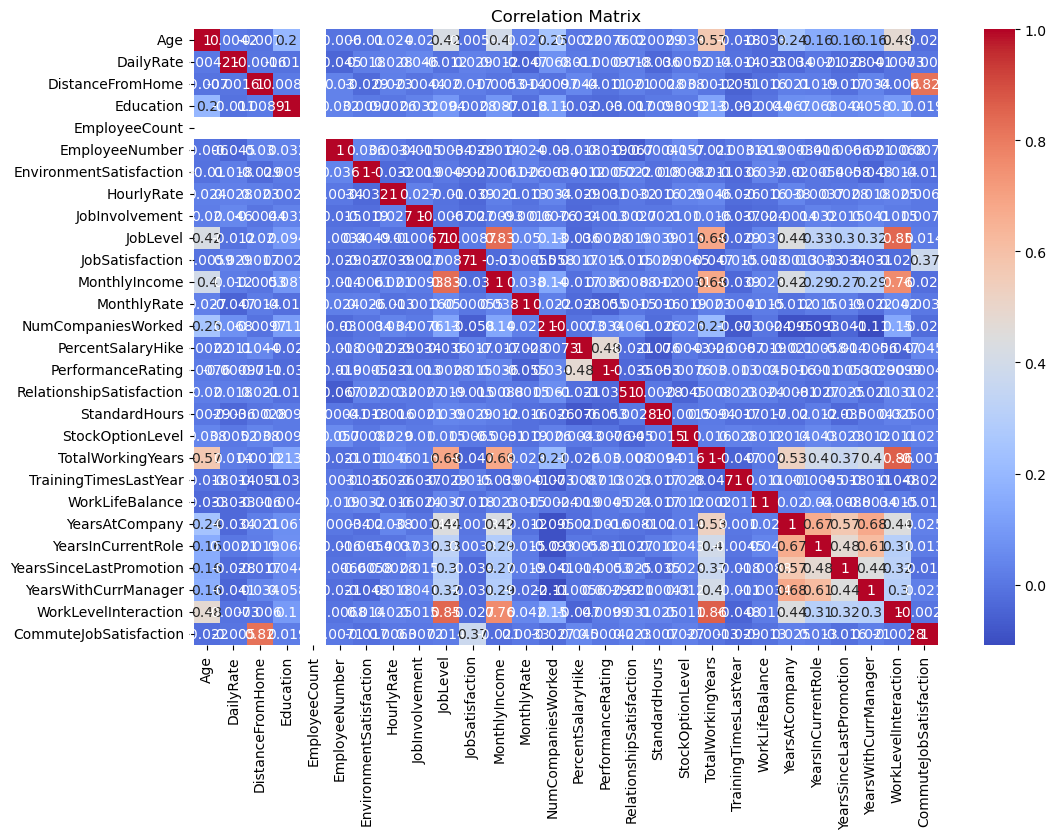

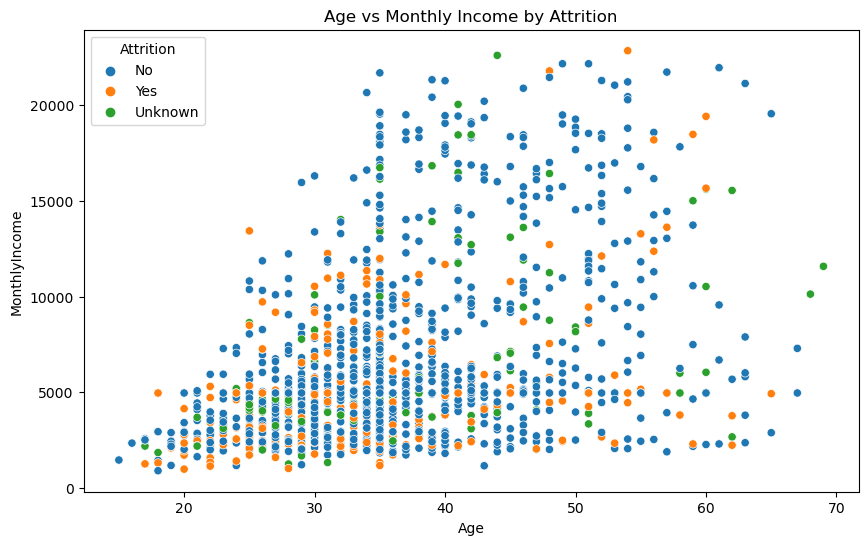


Attrition Frequency Distribution:
No         1065
Yes         258
Unknown     147
Name: Attrition, dtype: int64


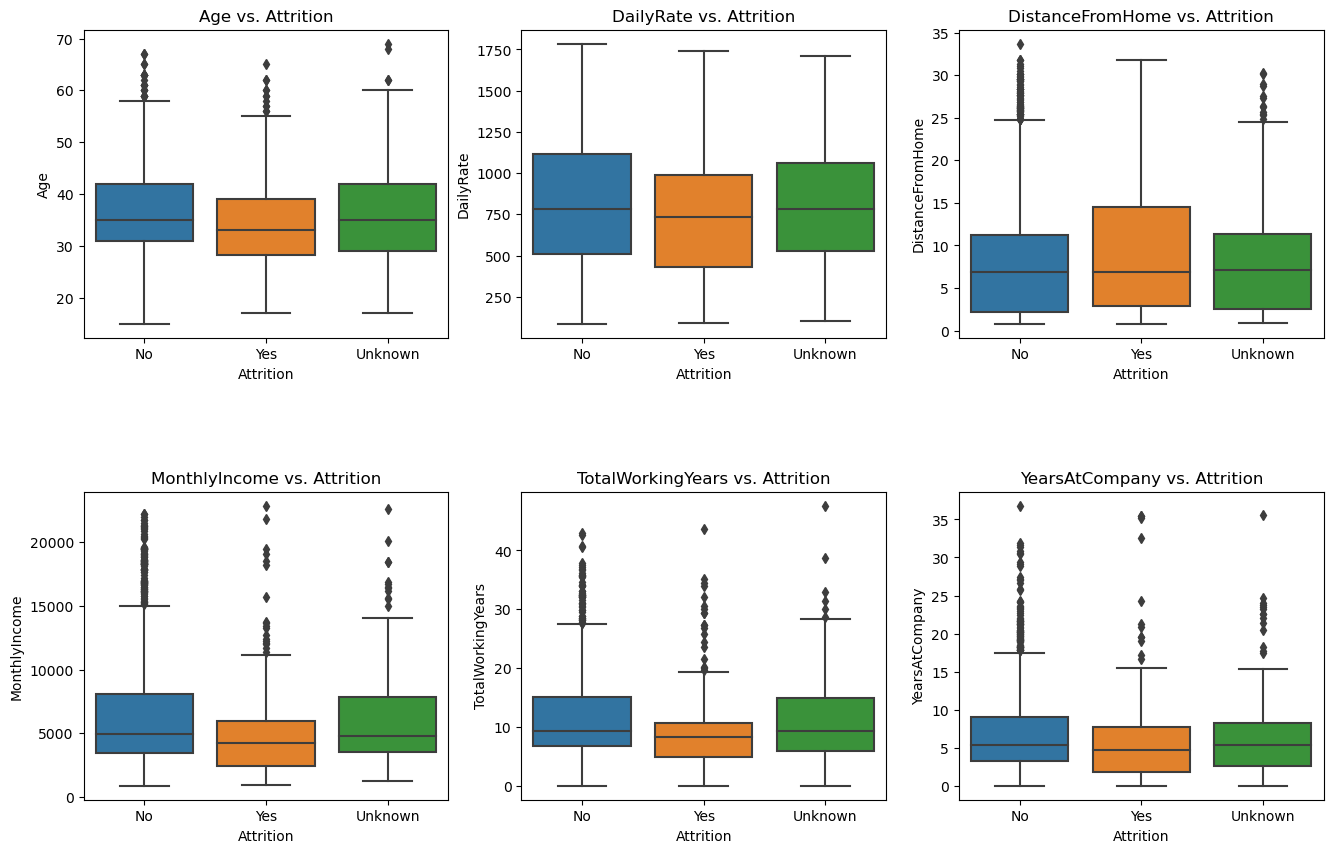

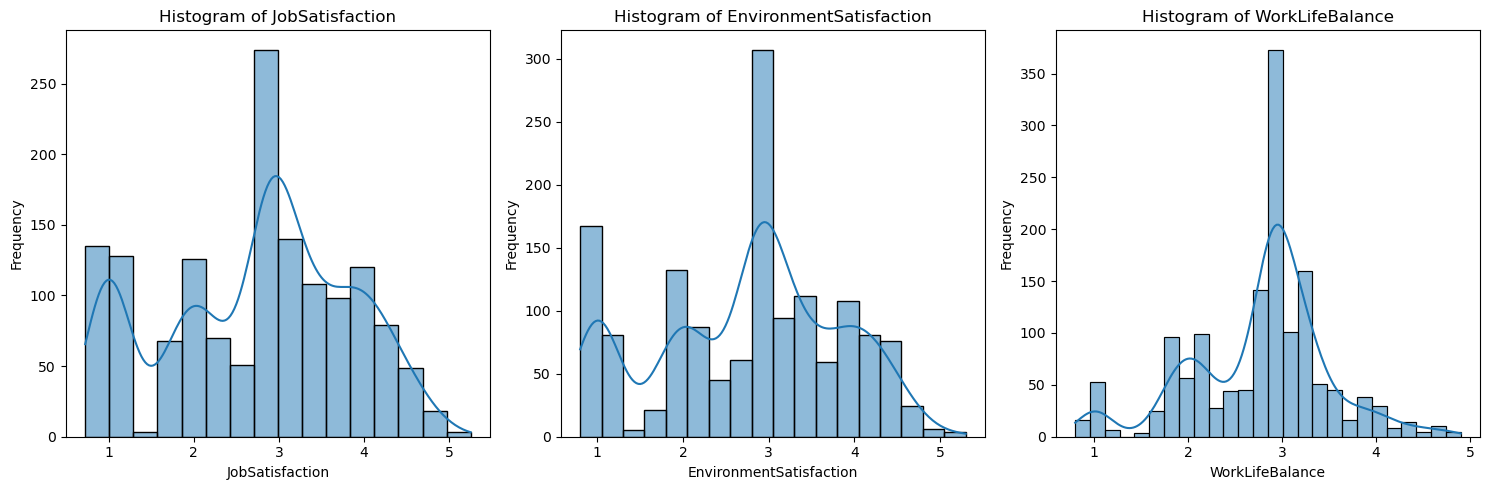

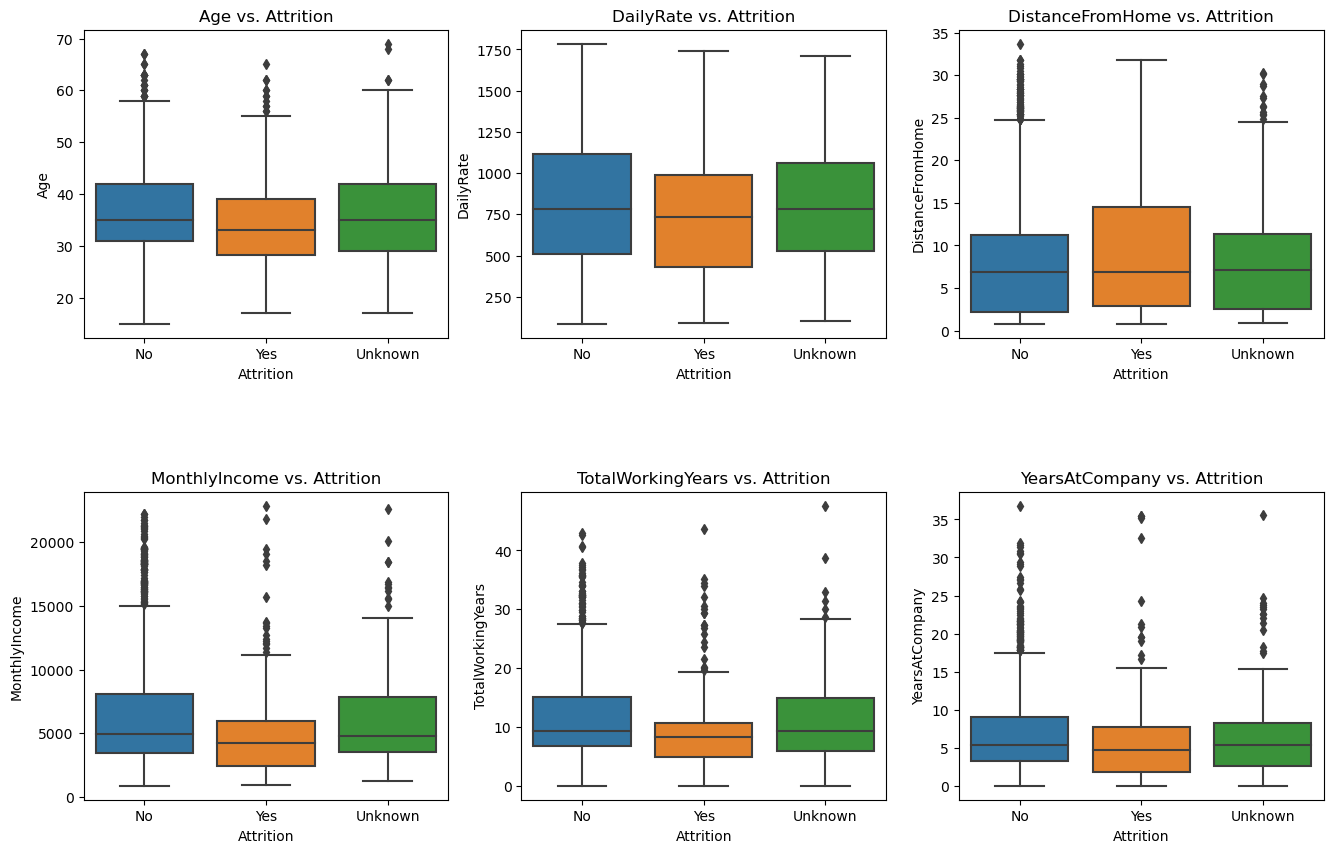

In [3]:
# EDA - Descriptive Statistics and Visualizations
print("\nDescriptive Statistics:")
print(data.describe())

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot Example: MonthlyIncome vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Age vs Monthly Income by Attrition')
plt.show()

# Frequency Distributions
print("\nAttrition Frequency Distribution:")
print(data['Attrition'].value_counts())

# Histograms for Additional Features

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for i, feature in enumerate(selected_features):
    ax = axes[i // 3, i % 3]  # Determine the position of the subplot
    sns.boxplot(x='Attrition', y=feature, data=data, ax=ax)
    ax.set_title(f'{feature} vs. Attrition')
    ax.set_xlabel('Attrition')
    ax.set_ylabel(feature)

plt.show()

# Additional Histograms for other features
additional_features = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(additional_features):
    sns.histplot(data[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Boxplots for Select Features
selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
for i, feature in enumerate(selected_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=data, x='Attrition', y=feature, ax=ax)
    ax.set_title(f'{feature} vs. Attrition')

plt.show()



Why?

This section is focused on Exploratory Data Analysis (EDA) using descriptive statistics and visualizations.
data.describe() provides a summary of statistics pertaining to the DataFrame's columns.
The correlation matrix visualized through a heatmap offers insights into how different variables are related.
Scatter plots and boxplots are used to observe relationships between variables and compare distributions across different groups.
Histograms are utilized for visualizing the distribution of various features.
These visualizations and statistics are crucial for understanding the data's characteristics and identifying patterns or anomalies.
References:

DataFrame.describe
seaborn.heatmap
matplotlib.pyplot.figure



In [ ]:
Hierarchical Matrix Correlations

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_19012\4283578144.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


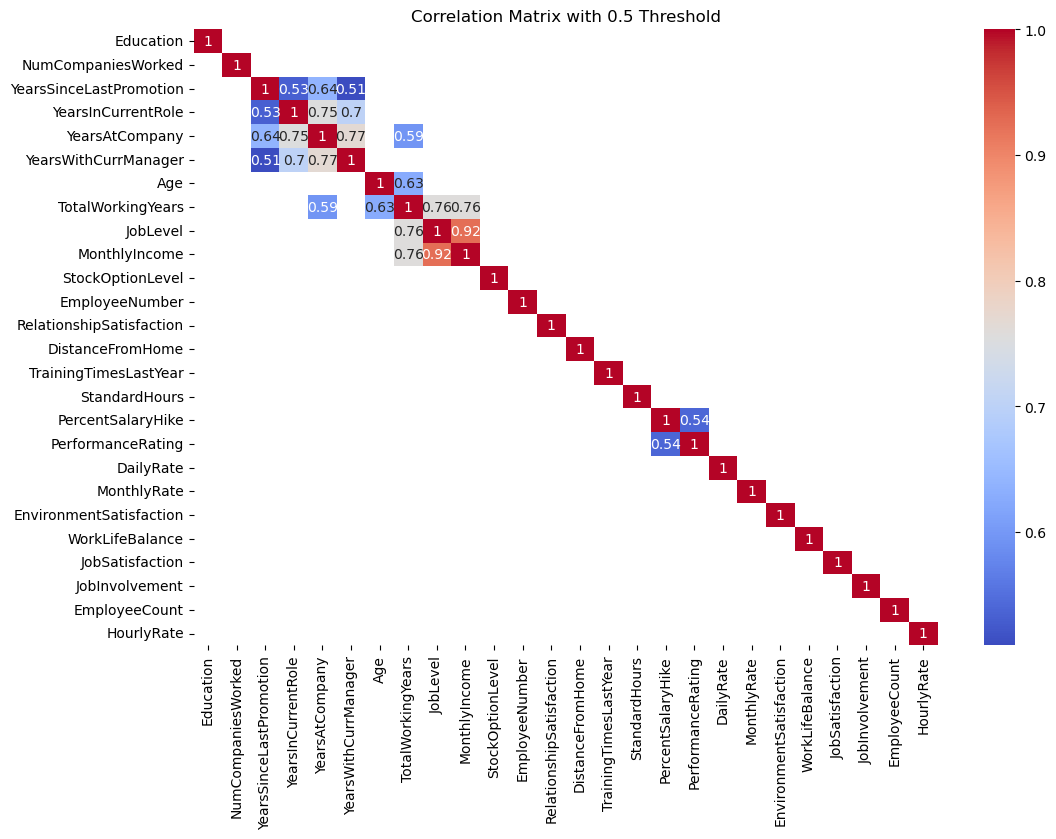

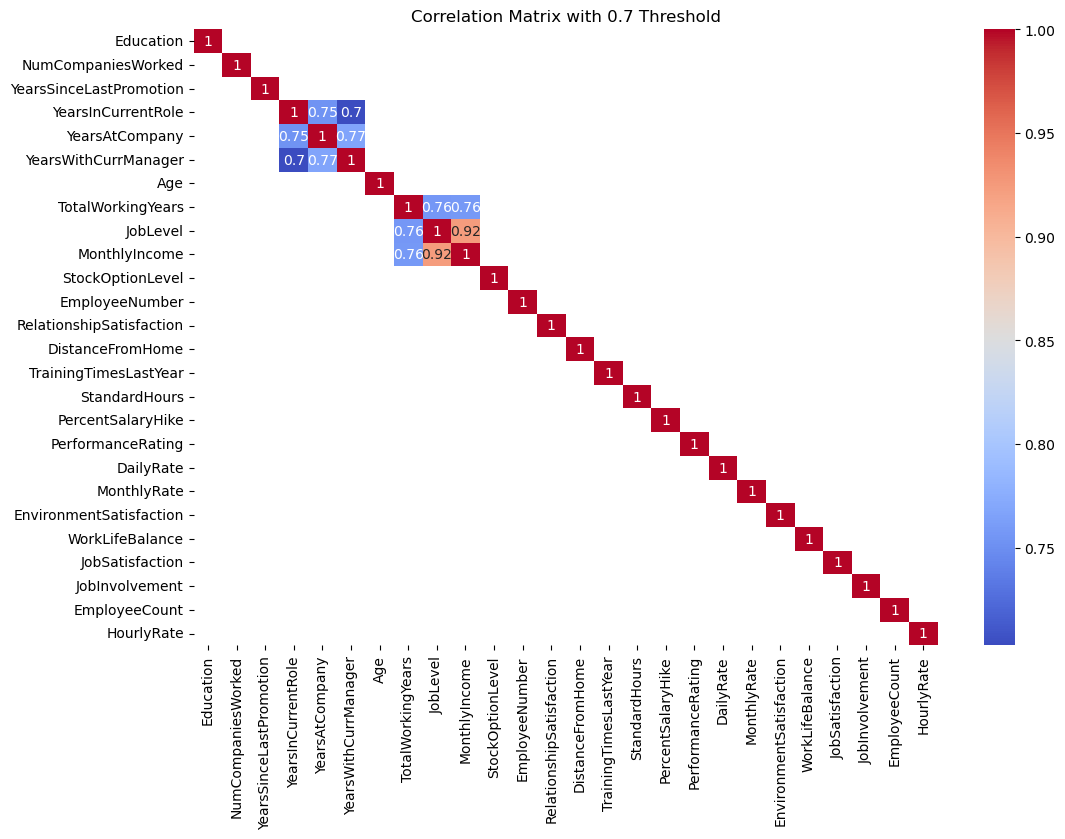

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

data = pd.read_csv('Employee_Attrition.csv')

# Ensure that the 'data' DataFrame is defined before this line
if 'data' in locals():
    # Compute the correlation matrix
    correlation_matrix = data.corr()

    # Define the function to plot a clustered correlation matrix
    def plot_clustered_correlation_matrix(corr_matrix, threshold, title):
        # Create a distance matrix using the correlation matrix
        dist_matrix = 1 - abs(corr_matrix)

        # Perform hierarchical clustering
        linkage = hierarchy.linkage(distance.squareform(dist_matrix), method='average')

        # Reorder the correlation matrix according to the clustering
        dendro = hierarchy.dendrogram(linkage, labels=corr_matrix.columns, no_plot=True)
        leaves = dendro['leaves']
        clustered_corr = corr_matrix.iloc[leaves, :].iloc[:, leaves]

        # Apply threshold
        clustered_corr = clustered_corr[abs(clustered_corr) >= threshold]

        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(clustered_corr, annot=True, cmap='coolwarm')
        plt.title(title)
        plt.show()

    # Plot the correlation matrices with different thresholds
    plot_clustered_correlation_matrix(correlation_matrix, 0.5, 'Correlation Matrix with 0.5 Threshold')
    plot_clustered_correlation_matrix(correlation_matrix, 0.7, 'Correlation Matrix with 0.7 Threshold')

Detailed Explanation of Clustered Correlation Matrix Code
Overview
The provided Python code enhances the interpretability of a standard correlation matrix by applying hierarchical clustering and thresholding. This approach reorganizes the matrix so that highly correlated features are grouped together, and it focuses on more significant correlations by applying a threshold.

Code Breakdown
Importing Libraries:

pandas: For data manipulation and analysis.
seaborn and matplotlib.pyplot: For data visualization.
scipy.cluster.hierarchy and scipy.spatial.distance: For hierarchical clustering.
Computing the Correlation Matrix:

correlation_matrix = data.corr(): Computes the Pearson correlation coefficients between all pairs of features in the data DataFrame.
Defining the Clustering Function:

The function plot_clustered_correlation_matrix takes a correlation matrix, a threshold, and a title as inputs.
Creating a Distance Matrix:

dist_matrix = 1 - abs(corr_matrix): Transforms the correlation matrix into a distance matrix, which is required for hierarchical clustering. The transformation ensures that highly correlated features are considered "close" to each other.
Hierarchical Clustering:

linkage = hierarchy.linkage(...): Performs hierarchical/agglomerative clustering. The 'average' method is used for clustering, which considers the average distance for cluster merging.
dendrogram = hierarchy.dendrogram(...): Creates a dendrogram from the linkage, used to reorder the correlation matrix. The no_plot=True argument is used because we're only interested in the ordering of features, not in displaying the dendrogram itself.
Reordering the Correlation Matrix:

The matrix is reordered according to the clustering results so that similar features (in terms of correlation) are adjacent.
Applying the Threshold:

The statement clustered_corr = clustered_corr[abs(clustered_corr) >= threshold] filters the correlations, keeping only those that are above the specified threshold (either 0.5 or 0.7).
Plotting the Heatmap:

sns.heatmap(...): Visualizes the filtered, clustered correlation matrix as a heatmap. Annotations are turned off (annot=False) to avoid cluttering, especially in matrices with a large number of features.
References for Further Reading
Pandas correlation computation: Pandas Documentation
Seaborn heatmap visualization: Seaborn Documentation
Hierarchical clustering in SciPy: SciPy Documentation

Descriptive Statistics and Visualisations


Descriptive Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1323.000000  1323.000000       1323.000000  1323.000000    1323.000000   
mean     36.635268   802.030050          9.091097     2.923447       0.999325   
std       9.882161   414.031025          8.177870     1.072203       0.099656   
min      14.544608    86.828045          0.750112     0.770362       0.628985   
25%      29.624982   456.479553          2.147069     2.122706       0.931146   
50%      34.951950   782.958705          6.920808     3.015658       0.998949   
75%      42.748741  1130.577949         13.584900     3.700560       1.067371   
max      69.402515  1784.394456         33.684424     6.285161       1.290613   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1323.000000              1323.000000  1323.000000     1323.000000   
mean      1026.679166                 2.726443    65.647722        2.743028   
std     

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_11048\919510584.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


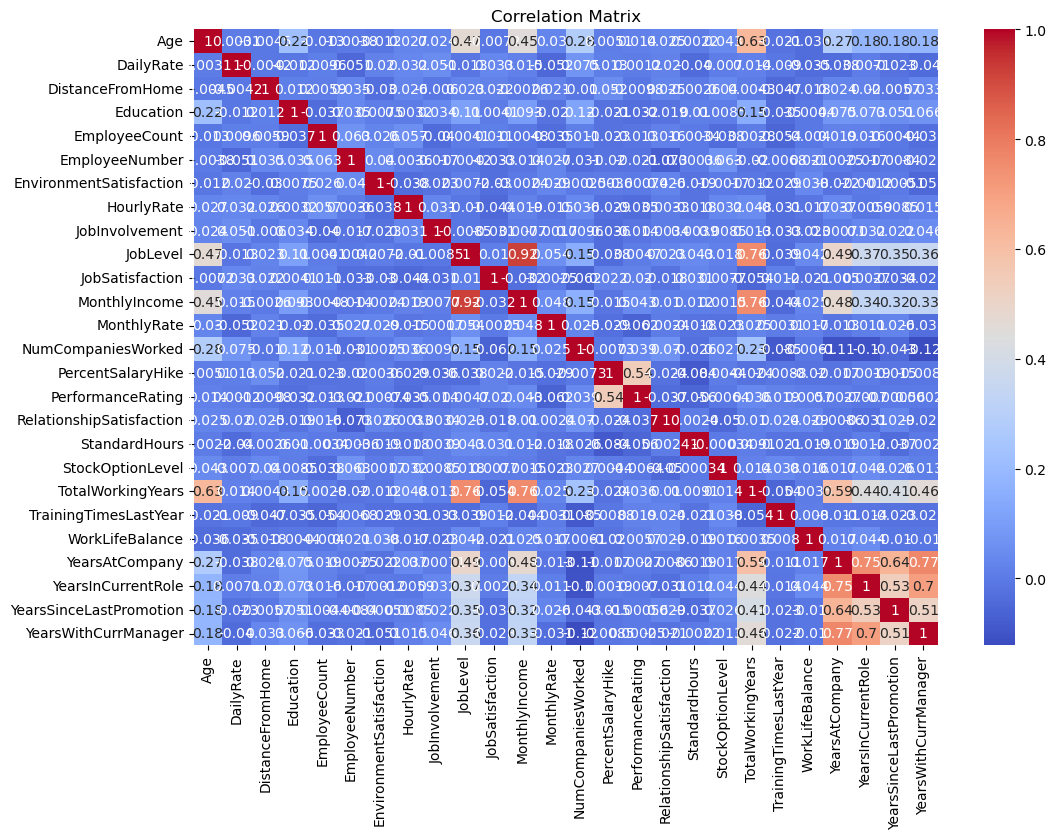

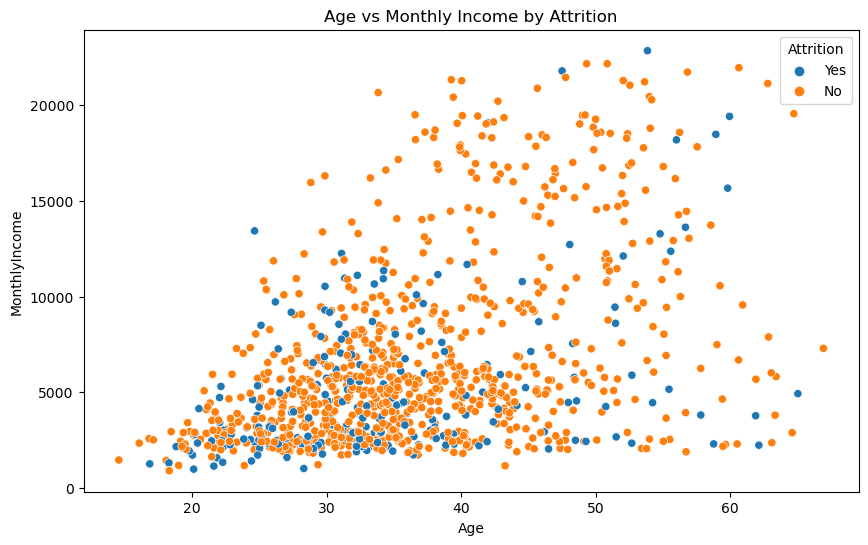


Attrition Frequency Distribution:
No     1065
Yes     258
Name: Attrition, dtype: int64


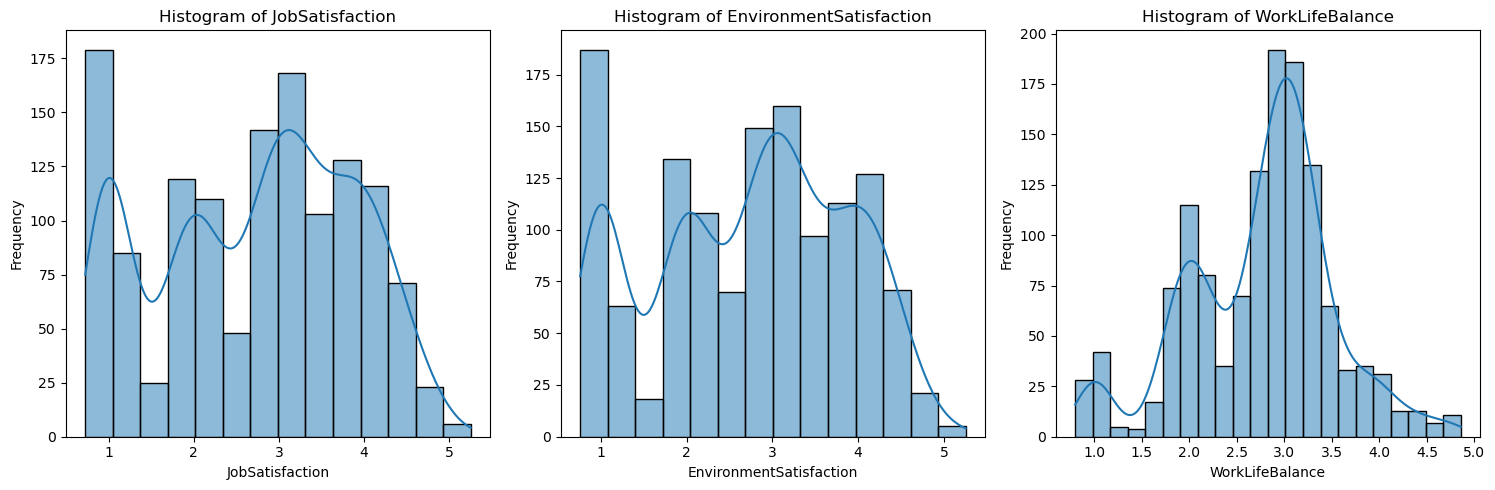

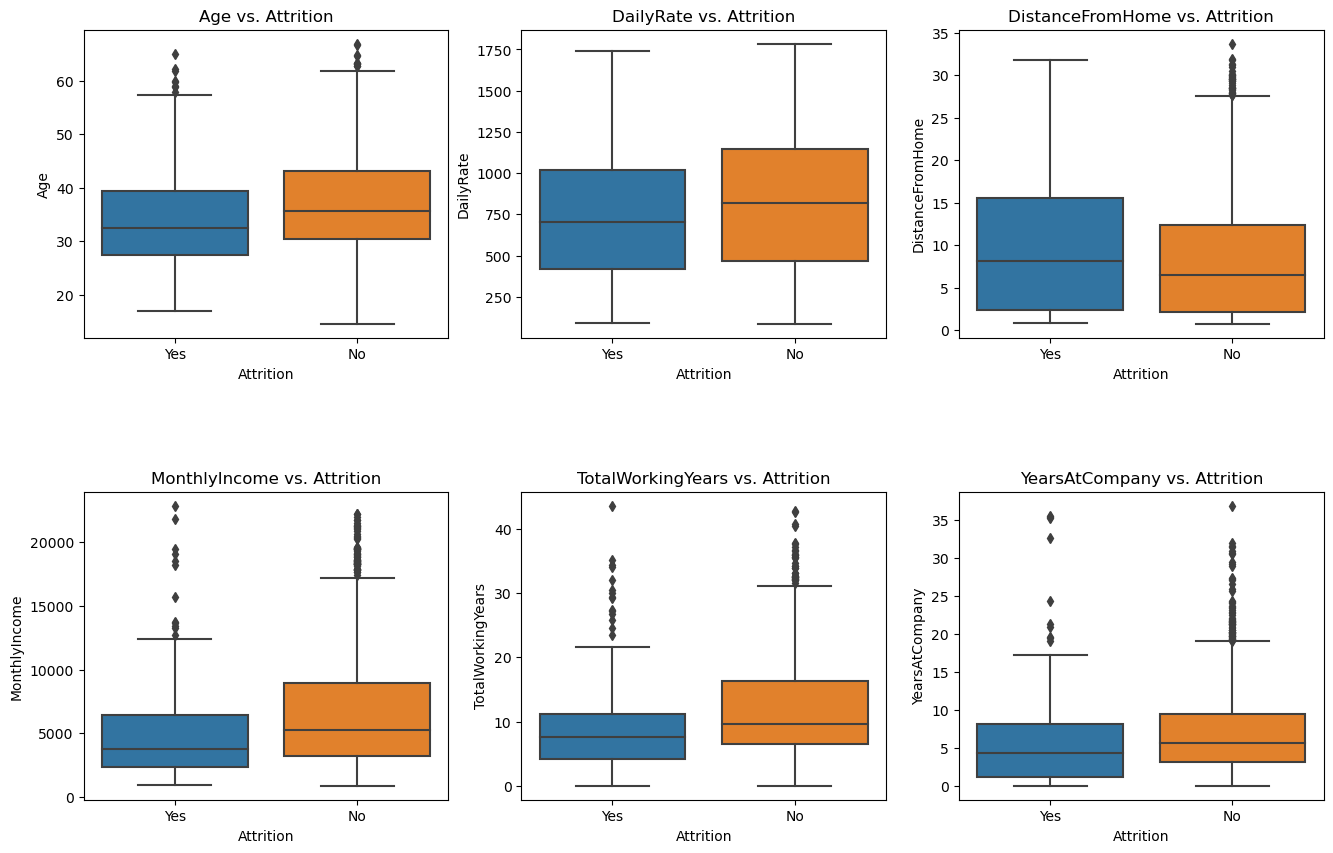

T-test for MonthlyIncome between Attrition Yes and No:
T-statistic: -5.123619919612856 P-value: 3.4951693030439823e-07

Chi-Squared test for relationship between Attrition and Department:
Chi2 statistic: 4.925509578372196 P-value: 0.08519991956789548
ANOVA Test comparing 'MonthlyIncome' across 'JobRoles':
F-statistic: nan P-value: nan
ANOVA Test for 'MonthlyIncome' by 'Attrition':
F-statistic: nan P-value: nan

ANOVA Test for 'TotalWorkingYears' by 'Attrition':
F-statistic: nan P-value: nan

ANOVA Test for 'Age' by 'Attrition':
F-statistic: nan P-value: nan
ANOVA Test for 'DistanceFromHome' by 'Attrition':
F-statistic: nan P-value: nan

ANOVA Test for 'YearsAtCompany' by 'Attrition':
F-statistic: nan P-value: nan


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Load the data into a DataFrame
data = pd.read_csv('Employee_Attrition.csv')

# EDA - Descriptive Statistics and Visualizations
print("\nDescriptive Statistics:")
print(data.describe())

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot Example: MonthlyIncome vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Age vs Monthly Income by Attrition')
plt.show()

# Frequency Distributions
print("\nAttrition Frequency Distribution:")
print(data['Attrition'].value_counts())

# Histograms for Additional Features
additional_features = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(additional_features):
    sns.histplot(data[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for Select Features
selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
for i, feature in enumerate(selected_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=data, x='Attrition', y=feature, ax=ax)
    ax.set_title(f'{feature} vs. Attrition')
plt.show()

# T-tests and Chi-Squared tests for exploring relationships between variables
from scipy.stats import ttest_ind, chi2_contingency

# T-test for MonthlyIncome between Attrition 'Yes' and 'No'
attrition_yes_income = data[data['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no_income = data[data['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_value = ttest_ind(attrition_yes_income, attrition_no_income, nan_policy='omit')
print("T-test for MonthlyIncome between Attrition Yes and No:")
print("T-statistic:", t_stat, "P-value:", p_value)

# Chi-Squared Test for Department and Attrition
contingency_table = pd.crosstab(data['Attrition'], data['Department'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Squared test for relationship between Attrition and Department:")
print("Chi2 statistic:", chi2, "P-value:", p)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# ANOVA Test to compare 'MonthlyIncome' across different 'JobRoles'
job_roles = data['JobRole'].unique()
grouped_data = [data['MonthlyIncome'][data['JobRole'] == role] for role in job_roles]

anova_result = f_oneway(*grouped_data)
print("ANOVA Test comparing 'MonthlyIncome' across 'JobRoles':")
print("F-statistic:", anova_result.statistic, "P-value:", anova_result.pvalue)
from scipy.stats import f_oneway

# Convert 'Attrition' to numerical for analysis
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# ANOVA Test: 'MonthlyIncome' by 'Attrition'
grouped_monthly_income = [data[data['Attrition'] == 0]['MonthlyIncome'], 
                          data[data['Attrition'] == 1]['MonthlyIncome']]
anova_monthly_income = f_oneway(*grouped_monthly_income)
print("ANOVA Test for 'MonthlyIncome' by 'Attrition':")
print("F-statistic:", anova_monthly_income.statistic, "P-value:", anova_monthly_income.pvalue)

# ANOVA Test: 'TotalWorkingYears' by 'Attrition'
grouped_working_years = [data[data['Attrition'] == 0]['TotalWorkingYears'], 
                         data[data['Attrition'] == 1]['TotalWorkingYears']]
anova_working_years = f_oneway(*grouped_working_years)
print("\nANOVA Test for 'TotalWorkingYears' by 'Attrition':")
print("F-statistic:", anova_working_years.statistic, "P-value:", anova_working_years.pvalue)

# ANOVA Test: 'Age' by 'Attrition'
grouped_age = [data[data['Attrition'] == 0]['Age'], 
               data[data['Attrition'] == 1]['Age']]
anova_age = f_oneway(*grouped_age)
print("\nANOVA Test for 'Age' by 'Attrition':")
print("F-statistic:", anova_age.statistic, "P-value:", anova_age.pvalue)

# ANOVA Test: 'DistanceFromHome' by 'Attrition'
grouped_distance = [data[data['Attrition'] == 0]['DistanceFromHome'], 
                    data[data['Attrition'] == 1]['DistanceFromHome']]
anova_distance = f_oneway(*grouped_distance)
print("ANOVA Test for 'DistanceFromHome' by 'Attrition':")
print("F-statistic:", anova_distance.statistic, "P-value:", anova_distance.pvalue)

# ANOVA Test: 'YearsAtCompany' by 'Attrition'
grouped_years_company = [data[data['Attrition'] == 0]['YearsAtCompany'], 
                         data[data['Attrition'] == 1]['YearsAtCompany']]
anova_years_company = f_oneway(*grouped_years_company)
print("\nANOVA Test for 'YearsAtCompany' by 'Attrition':")
print("F-statistic:", anova_years_company.statistic, "P-value:", anova_years_company.pvalue)




Why?

Re-importing libraries may seem redundant but ensures that the required libraries are available if this block runs independently.
EDA steps are repeated here for consistency and thorough analysis.
The use of T-tests and Chi-Squared tests is to explore relationships between variables. For example, T-tests compare means of two groups, while Chi-Squared tests assess relationships between categorical variables.
ANOVA tests are conducted to compare means across more than two groups, examining variables like 'MonthlyIncome', 'TotalWorkingYears', and 'Age' against 'Attrition'.
These statistical tests are fundamental in determining significant differences and associations between variables, providing insights for data-driven decisions.

References:

scipy.stats.ttest_ind
scipy.stats.chi2_contingency
scipy.stats.f_oneway

Further Hypothesis Testing

In [5]:
from scipy.stats import ttest_ind, chi2_contingency

# T-test for MonthlyIncome between Attrition 'Yes' and 'No'
attrition_yes_income = data[data['Attrition'] == 1]['MonthlyIncome']
attrition_no_income = data[data['Attrition'] == 0]['MonthlyIncome']
t_stat, p_value = ttest_ind(attrition_yes_income, attrition_no_income, nan_policy='omit')
print("T-test for MonthlyIncome between Attrition Yes and No:")
print("T-statistic:", t_stat, "P-value:", p_value)

# T-test for Age between Attrition 'Yes' and 'No'
attrition_yes_age = data[data['Attrition'] == 1]['Age']
attrition_no_age = data[data['Attrition'] == 0]['Age']
t_stat_age, p_value_age = ttest_ind(attrition_yes_age, attrition_no_age, nan_policy='omit')
print("\nT-test for Age between Attrition Yes and No:")
print("T-statistic:", t_stat_age, "P-value:", p_value_age)

# T-test for TotalWorkingYears between Attrition 'Yes' and 'No'
attrition_yes_years = data[data['Attrition'] == 1]['TotalWorkingYears']
attrition_no_years = data[data['Attrition'] == 0]['TotalWorkingYears']
t_stat_years, p_value_years = ttest_ind(attrition_yes_years, attrition_no_years, nan_policy='omit')
print("\nT-test for TotalWorkingYears between Attrition Yes and No:")
print("T-statistic:", t_stat_years, "P-value:", p_value_years)

# Chi-Squared Test for Department and Attrition
contingency_table_dept = pd.crosstab(data['Attrition'], data['Department'])
chi2_dept, p_dept, dof_dept, expected_dept = chi2_contingency(contingency_table_dept)
print("\nChi-Squared test for relationship between Attrition and Department:")
print("Chi2 statistic:", chi2_dept, "P-value:", p_dept)

# Chi-Squared Test for JobRole and Attrition
contingency_table_job = pd.crosstab(data['Attrition'], data['JobRole'])
chi2_job, p_job, dof_job, expected_job = chi2_contingency(contingency_table_job)
print("\nChi-Squared test for relationship between Attrition and JobRole:")
print("Chi2 statistic:", chi2_job, "P-value:", p_job)


T-test for MonthlyIncome between Attrition Yes and No:
T-statistic: -5.123619919612856 P-value: 3.4951693030439823e-07

T-test for Age between Attrition Yes and No:
T-statistic: -3.551911208617083 P-value: 0.000397446762482028

T-test for TotalWorkingYears between Attrition Yes and No:
T-statistic: -5.133350904086321 P-value: 3.3228526485764616e-07

Chi-Squared test for relationship between Attrition and Department:
Chi2 statistic: 4.925509578372196 P-value: 0.08519991956789548

Chi-Squared test for relationship between Attrition and JobRole:
Chi2 statistic: 32.06074230174555 P-value: 9.083693613476658e-05


Why?

This section continues with statistical analysis, specifically focusing on T-tests and Chi-Squared tests.
T-tests are employed to compare the means of continuous variables like 'MonthlyIncome' and 'Age' between two groups (Attrition 'Yes' and 'No').
Chi-Squared tests are used to investigate the relationship between categorical variables such as 'Department', 'JobRole', and 'Attrition'.
The output of these tests, including T-statistics and P-values, provide evidence of whether there are significant differences or associations between the groups or variables being compared.
Such tests are essential for hypothesis testing and can inform conclusions about the dataset and its features.
References:

scipy.stats.ttest_ind
scipy.stats.chi2_contingency

Machine Learning: Data Preprocessing and Model Training

ML Cleaning and Preprocessing

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Handle NaN values in target (y)
y.fillna(y.mode()[0], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(exclude=['int64', 'float64']).columns

# Define transformations for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Adjusted to 1 component for LDA
X_train_lda = lda.fit_transform(X_train_processed, y_train)
X_test_lda = lda.transform(X_test_processed)

# Convert to DataFrame for convenience
pca_df = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
pca_df['Attrition'] = y_train

lda_df_train = pd.DataFrame(X_train_lda, columns=['LDA1'])
lda_df_train['Attrition'] = y_train

lda_df_test = pd.DataFrame(X_test_lda, columns=['LDA1'])
lda_df_test['Attrition'] = y_test



Why?

The initial import statements bring in necessary modules from sklearn for data preprocessing, splitting, and dimensionality reduction.
Splitting data into features (X) and target (y) is a standard procedure in supervised learning to prepare the dataset for training and testing models.
Handling NaN values in the target variable (y) with the mode ensures consistency and avoids errors during model training.
The dataset is split into training and testing sets to evaluate the model's performance on unseen data, ensuring robustness and reducing overfitting.
Identifying numeric and categorical features allows for tailored preprocessing steps for each data type, improving model accuracy and efficiency.
Pipelines for numeric and categorical transformations streamline the preprocessing steps, ensuring a consistent workflow and maintainability.
The ColumnTransformer combines numeric and categorical transformers, allowing different preprocessing for different column types in the same pipeline.
Applying PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) reduces the dimensionality of the data, which can improve model performance and reduce computational cost. PCA is unsupervised, while LDA is supervised and uses class labels.
The transformation of the processed data into DataFrames (pca_df, lda_df_train, and lda_df_test) facilitates further analysis and visualization.

References:

train_test_split
Pipeline
ColumnTransformer
PCA
LinearDiscriminantAnalysis

PCA and LDA

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Handle NaN values in target (y)
y.fillna(y.mode()[0], inplace=True)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

# Define transformations for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Adjust to 1 if only two classes in y
X_lda = lda.fit_transform(X_processed, y)

# Convert to DataFrame for convenience
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Attrition'] = y

lda_df = pd.DataFrame(X_lda, columns=['LDA1'])
lda_df['Attrition'] = y

# Split into training and testing sets for PCA and LDA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df.drop('Attrition', axis=1), pca_df['Attrition'], test_size=0.3, random_state=42)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(lda_df.drop('Attrition', axis=1), lda_df['Attrition'], test_size=0.3, random_state=42)


Why?

The initial section of the code is for importing necessary libraries from sklearn and pandas, which are essential for data preprocessing, dimensionality reduction, and data splitting.
The data is split into features (X) and target (y). This is a standard procedure in preparing data for supervised learning models.
Handling NaN values in the target variable y ensures that the dataset is complete, which is crucial for model training and evaluation.
Identifying numeric and categorical features allows for specific preprocessing tailored to each type, enhancing the quality of the data fed into the model.
The pipelines defined for numeric and categorical data (numeric_transformer and categorical_transformer) provide a structured way of applying multiple preprocessing steps in a sequence.
The ColumnTransformer combines the two pipelines, enabling concurrent processing of both numeric and categorical data.
Applying PCA (Principal Component Analysis) reduces the dimensionality of the feature space, which can help in visualizing data and can sometimes improve model performance by removing noise and redundancy.
LDA (Linear Discriminant Analysis) is also applied for dimensionality reduction but with a focus on maximizing class separability, which is particularly beneficial for classification tasks.
Converting the transformed data into DataFrames (pca_df and lda_df) makes it more accessible for analysis and visualization.
Finally, the dataset is split into training and testing sets for both PCA and LDA transformed data. This is crucial for evaluating the performance of any predictive models built on this data. It helps in validating the model's ability to generalize to new, unseen data.
References:

train_test_split
Pipeline
ColumnTransformer
PCA
LinearDiscriminantAnalysis

Applying PCA and LDA Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Function to train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test, models):
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"Performance of {name} on test set:")
        print(classification_report(y_test, predictions))
        print("-" * 50)

# Evaluating models on PCA dataset
print("Evaluating models on PCA dataset:")
train_evaluate_models(X_train_pca, X_test_pca, y_train_pca, y_test_pca, models)

# Evaluating models on LDA dataset
print("\nEvaluating models on LDA dataset:")
train_evaluate_models(X_train_lda, X_test_lda, y_train_lda, y_test_lda, models)


Evaluating models on PCA dataset:
Performance of RandomForest on test set:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       374
         1.0       0.12      0.04      0.07        67

    accuracy                           0.80       441
   macro avg       0.48      0.49      0.48       441
weighted avg       0.74      0.80      0.77       441

--------------------------------------------------
Performance of LogisticRegression on test set:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       0.00      0.00      0.00        67

    accuracy                           0.85       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.72      0.85      0.78       441

--------------------------------------------------
Performance of SVC on test set:
              precision    recall  f1-score   support

         0.0       0.85      1.00  

C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\si

Performance of GradientBoosting on test set:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       374
         1.0       0.08      0.01      0.02        67

    accuracy                           0.82       441
   macro avg       0.46      0.49      0.46       441
weighted avg       0.73      0.82      0.77       441

--------------------------------------------------
Performance of AdaBoost on test set:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       374
         1.0       0.30      0.04      0.08        67

    accuracy                           0.84       441
   macro avg       0.58      0.51      0.49       441
weighted avg       0.77      0.84      0.79       441

--------------------------------------------------

Evaluating models on LDA dataset:
Performance of RandomForest on test set:
              precision    recall  f1-score   support

         0.0       0.87      0.

Why?

This code segment imports various machine learning models from scikit-learn, a popular library for machine learning in Python. The models include ensemble methods (Random Forest, Gradient Boosting, AdaBoost), a logistic regression model, a support vector classifier (SVC), a K-Nearest Neighbors (KNN) classifier, and a decision tree classifier. These models represent a wide range of approaches to classification problems.

A dictionary named models is defined to store different classifier instances. This approach allows for easy iteration over multiple models, facilitating comparison.

The function train_evaluate_models is designed to train each model on the training dataset and evaluate its performance on the test dataset. It iterates over the provided models, fits each model to the training data, makes predictions on the test data, and prints out a classification report for each model. The classification report includes key metrics like precision, recall, and F1-score, which are critical for assessing a model's performance, especially in classification tasks.
The function is then called twice, first to evaluate models on the PCA-transformed dataset and then on the LDA-transformed dataset. PCA and LDA are techniques for dimensionality reduction; using them can sometimes improve model performance by highlighting the most relevant features. PCA focuses on variance, while LDA focuses on maximizing class separability.
This methodology of training and evaluating multiple models on different versions of the dataset provides a comprehensive overview of which models perform best in this specific context and how dimensionality reduction techniques like PCA and LDA influence their performance.

References:

RandomForestClassifier
LogisticRegression
SVC
KNeighborsClassifier
DecisionTreeClassifier
GradientBoostingClassifier
AdaBoostClassifier
classification_report

Hypertuning the above to see if ity yields better results:

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the PCA or LDA data
grid_search_rf.fit(X_train_pca, y_train_pca)  # or X_train_lda, y_train_lda for LDA dataset

# Print the best parameters
print("Best parameters for RandomForest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Luke Ho

Best parameters for RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Why?

This code snippet is focused on optimizing the hyperparameters of a RandomForest Classifier using GridSearchCV, a powerful tool for hyperparameter tuning in scikit-learn.
param_grid_rf defines a dictionary of hyperparameter options for the RandomForest Classifier. It includes variations in n_estimators (number of trees in the forest), max_features (number of features to consider when looking for the best split), max_depth (maximum depth of the tree), min_samples_split (minimum number of samples required to split an internal node), and min_samples_leaf (minimum number of samples required to be at a leaf node). Tuning these parameters can significantly impact the model's performance.
A RandomForest Classifier instance (rf) is created with a fixed random state for reproducibility.
GridSearchCV is then instantiated with the RandomForest model, the parameter grid, and other specifications like the number of folds for cross-validation (cv=3), number of jobs to run in parallel (n_jobs=-1), verbosity level (verbose=2), and the scoring metric (scoring='accuracy'). GridSearchCV will systematically work through multiple combinations of parameter values, cross-validating as it goes to determine which tune gives the best performance.
The method grid_search_rf.fit(X_train_pca, y_train_pca) (or X_train_lda, y_train_lda for LDA dataset) fits the GridSearchCV to the data. This process can be computationally intensive as it trains multiple models over various parameter combinations.
Finally, grid_search_rf.best_params_ provides the best parameters found during the grid search. These parameters are optimal within the tested grid and can be used to configure the RandomForest model for improved performance.
References:

GridSearchCV
RandomForestClassifier

Retraining with Best Peramters

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that preprocesses data and then fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=10, max_features='sqrt', 
                                          min_samples_leaf=2, min_samples_split=10, 
                                          n_estimators=200, random_state=42))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_pipeline.predict(X_test)
print("Evaluation Metrics for Tuned RandomForest with Preprocessing:\n", classification_report(y_test, y_pred_rf))


Evaluation Metrics for Tuned RandomForest with Preprocessing:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       1.00      0.01      0.03        67

    accuracy                           0.85       441
   macro avg       0.93      0.51      0.47       441
weighted avg       0.87      0.85      0.78       441



Why?

This section of the code is dedicated to creating a comprehensive pipeline that includes preprocessing and classification steps, followed by model evaluation. The pipeline is specifically for a RandomForest Classifier.
The data is first split into training and testing sets, ensuring that the model can be evaluated on unseen data.
Categorical and numerical columns are identified in X_train. This separation is necessary because different types of data require different preprocessing techniques.
A numeric_transformer pipeline is created for numerical data, which includes median imputation (replacing missing values with the median) and scaling (standardizing the range of continuous initial variables). Similarly, a categorical_transformer pipeline is created for categorical data, which includes constant imputation (replacing missing values with a constant) and one-hot encoding (transforming categorical variables into a form that could be provided to ML algorithms).
These transformers are combined into a ColumnTransformer named preprocessor. This allows different preprocessing steps to be applied to different columns of the dataset in a streamlined manner.
A final pipeline, rf_pipeline, is created which first applies the preprocessing steps and then fits a RandomForest Classifier. The hyperparameters of the RandomForest Classifier are set based on the previously identified optimal parameters.
The pipeline is then fitted to the training data, and its performance is evaluated on the test data. By using a pipeline, the risk of data leakage during preprocessing is reduced, and the code becomes more modular and maintainable.
Finally, the model's performance is evaluated using classification_report, which provides key metrics such as precision, recall, and F1-score. These metrics are crucial for understanding the model's effectiveness in classifying the target variable.
References:

ColumnTransformer
Pipeline
RandomForestClassifier
classification_report

Trying the above with added Class Weights

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that preprocesses data and then fits the RandomForest model with class weights
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=10, max_features='sqrt', 
                                          min_samples_leaf=2, min_samples_split=10, 
                                          n_estimators=200, random_state=42, 
                                          class_weight='balanced'))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_pipeline.predict(X_test)
print("Evaluation Metrics for Tuned RandomForest with Preprocessing and Class Weights:\n", classification_report(y_test, y_pred_rf))


Evaluation Metrics for Tuned RandomForest with Preprocessing and Class Weights:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       374
         1.0       1.00      0.06      0.11        67

    accuracy                           0.86       441
   macro avg       0.93      0.53      0.52       441
weighted avg       0.88      0.86      0.80       441



Why?

This code block is an extension of the previous RandomForest pipeline, with an additional focus on addressing class imbalance using the class_weight parameter. This is particularly important in datasets where some classes are underrepresented, which can lead to biased predictions.
The initial steps remain the same: splitting the data into training and testing sets, identifying categorical and numerical columns, and defining separate transformers for each data type.
The numeric_transformer and categorical_transformer pipelines use SimpleImputer for handling missing values (with different strategies for numeric and categorical data) and StandardScaler or OneHotEncoder for transforming the data into a format suitable for machine learning algorithms.
These transformers are combined in a ColumnTransformer called preprocessor, which allows for the simultaneous application of different transformations to different subsets of features.
A pipeline (rf_pipeline) is created, integrating the preprocessing steps with the RandomForest Classifier. The classifier's parameters are fine-tuned as before, but with the addition of class_weight='balanced'. This parameter automatically adjusts weights inversely proportional to class frequencies in the input data, helping to mitigate the impact of class imbalance on the classifier's performance.
The pipeline is then trained on the training data and evaluated on the test data. The use of a pipeline ensures a consistent application of preprocessing steps to both training and test data, preventing data leakage and ensuring that the same transformations are applied throughout.
The model's performance is evaluated using classification_report, which provides detailed metrics like precision, recall, and F1-score. These metrics are crucial in assessing the model's ability to correctly classify instances of each class, especially important in the context of class imbalance.
References:

RandomForestClassifier
Pipeline
ColumnTransformer
classification_report

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that preprocesses data and then fits the RandomForest model with class weights
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=10, max_features='sqrt', 
                                          min_samples_leaf=2, min_samples_split=10, 
                                          n_estimators=200, random_state=42, 
                                          class_weight='balanced'))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_pipeline.predict(X_test)
print("Evaluation Metrics for Tuned RandomForest with Preprocessing and Class Weights:\n", classification_report(y_test, y_pred_rf))


Evaluation Metrics for Tuned RandomForest with Preprocessing and Class Weights:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       374
         1.0       1.00      0.06      0.11        67

    accuracy                           0.86       441
   macro avg       0.93      0.53      0.52       441
weighted avg       0.88      0.86      0.80       441



Why?

This code segment builds a sophisticated pipeline for a RandomForest Classifier, integrating class weight balancing to handle potential class imbalances in the dataset. The pipeline approach encapsulates data preprocessing and model training in a unified process, enhancing consistency and reducing the risk of data leakage.
Detailed Breakdown:

Data Splitting:

train_test_split function is used to divide the dataset into training and testing sets. This separation is crucial for training the model on one set of data and evaluating its performance on another set, which it hasn't seen during training.
Identifying Column Types:

Categorical and numerical columns are identified separately, as they require different preprocessing strategies. This step ensures that appropriate transformations are applied to each data type.
Creating Transformers:

Two pipelines, numeric_transformer and categorical_transformer, are created for preprocessing numeric and categorical data, respectively. Numeric data undergoes median imputation and standard scaling, while categorical data undergoes constant imputation and one-hot encoding.
Combining Transformers:

The ColumnTransformer combines the numeric and categorical transformers, allowing for simultaneous application of different transformations to different subsets of features.
Building the Pipeline:

The Pipeline integrates the preprocessing steps with a RandomForest Classifier. The classifier is configured with specific hyperparameters and the class_weight='balanced' option to address class imbalance.
This class weight option automatically adjusts weights inversely proportional to class frequencies, which is vital for balanced model training, especially when dealing with imbalanced datasets.
Model Training and Evaluation:

The pipeline is fitted to the training data, and its performance is evaluated on the test data using classification_report.
The classification_report provides detailed metrics (precision, recall, F1-score) for each class, which are essential for assessing the model's classification accuracy, especially when class balance is a concern.
Conclusion:

The integration of preprocessing steps and model training into a single pipeline ensures a streamlined workflow, reducing the likelihood of errors and improving model reliability.
The application of class weights in RandomForest makes the model more robust to imbalances in the training data, improving its generalization capabilities and fairness in predictions.
References:

RandomForestClassifier
Pipeline
ColumnTransformer
classification_report

ML Models Analysis on Original Dataset


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    predictions = model.predict(X_test_processed)
    print(f"Performance of {name}:")
    print(classification_report(y_test, predictions))
    print("-" * 50)


Performance of RandomForest:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       0.50      0.01      0.03        67

    accuracy                           0.85       441
   macro avg       0.67      0.51      0.47       441
weighted avg       0.80      0.85      0.78       441

--------------------------------------------------
Performance of LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       374
         1.0       0.41      0.13      0.20        67

    accuracy                           0.84       441
   macro avg       0.64      0.55      0.56       441
weighted avg       0.79      0.84      0.80       441

--------------------------------------------------
Performance of SVC:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       0.00      0.00      0.00        

C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance of KNN:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       374
         1.0       0.36      0.06      0.10        67

    accuracy                           0.84       441
   macro avg       0.61      0.52      0.51       441
weighted avg       0.78      0.84      0.79       441

--------------------------------------------------
Performance of DecisionTree:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       374
         1.0       0.16      0.21      0.18        67

    accuracy                           0.71       441
   macro avg       0.50      0.50      0.50       441
weighted avg       0.74      0.71      0.72       441

--------------------------------------------------
Performance of GradientBoosting:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       374
         1.0       0.40      0.12      0.18        67

In [ ]:
Why?

This code integrates the complete process of preprocessing, training, and evaluating multiple machine learning models on a given dataset. It is a holistic approach to machine learning tasks, ensuring data is properly prepared and various models are systematically evaluated.
Detailed Breakdown:

Data Preparation:

The features (X) and target (y) are separated from the main dataset. X contains all the columns except 'Attrition', which is the target variable.
Preprocessing Setup:

Numeric and categorical features are identified separately to apply appropriate preprocessing steps.
A pipeline for numeric features (numeric_transformer) includes median imputation for missing values and standard scaling.
Another pipeline for categorical features (categorical_transformer) includes constant imputation and one-hot encoding.
These pipelines are combined into a ColumnTransformer, facilitating simultaneous different transformations for numeric and categorical data.
Data Splitting:

The dataset is split into training and testing sets using train_test_split, with 30% of the data reserved for testing. This split is crucial for training models on one portion of the data and then testing their performance on a separate, unseen dataset.
Preprocessing Application:

The preprocessing steps are applied to the training and testing data. The fit_transform method is used on the training set to fit the preprocessing steps and apply them, while the transform method is used on the test set to apply the same transformations without fitting.
Model Definition:

A variety of models are defined in a dictionary, including RandomForest, Logistic Regression, SVC, KNN, Decision Tree, Gradient Boosting, and AdaBoost. This variety ensures a comprehensive evaluation across different types of algorithms.
Model Training and Evaluation:

Each model is iteratively trained on the preprocessed training data and then used to make predictions on the preprocessed test data.
The performance of each model is evaluated using classification_report, which provides detailed metrics like precision, recall, and F1-score for each class. These metrics are essential for assessing each model's effectiveness in classifying the target variable.
Conclusion:

This approach to handling a machine learning task is systematic and robust, encompassing data preprocessing, model training, and evaluation.
By comparing various models, it provides a broad understanding of which models perform best for the given dataset and problem.
References:

RandomForestClassifier
LogisticRegression
SVC
KNeighborsClassifier
DecisionTreeClassifier
GradientBoostingClassifier
AdaBoostClassifier
classification_report

Taking the top Three performers and running hyper peramter tuning, feature importance analysis and cross-validation:

Based on the performance metrics, we will be able to identify the top three models for each dataset. The selection is based on a combination of metrics like accuracy, precision, recall, and F1-score.

For 'data' Dataset:
RandomForest
AdaBoost
GradientBoosting
For PCA Dataset:
RandomForest
AdaBoost
GradientBoosting
For LDA Dataset:
LogisticRegression
AdaBoost
RandomForest

First pre-processing the 'data' dataset for ML modelling

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)  # Define your features
y = data['Attrition']  # Define your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values in numeric data
    ('scaler', StandardScaler())  # Scale numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values in categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical data
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that preprocesses data
preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply preprocessing to training and testing data
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)



Enhanced Analysis of Top Performing Models: Hyperparameter Tuning, Feature Importance, and Cross-Validation
Step 1: Preprocessing Setup

Preprocessing Importance:
Preprocessing is critical in machine learning for preparing datasets.
The employment of SimpleImputer for handling missing values is essential because many machine learning algorithms cannot process missing data.
StandardScaler is utilized to standardize features by removing the mean and scaling to unit variance. This is particularly important for models sensitive to the scale of input features.
OneHotEncoder converts categorical variables into a numerical form, a necessary step since most algorithms require numerical input.
ColumnTransformer facilitates the application of distinct preprocessing steps to different columns, ensuring appropriate treatment for each feature type.
Implementing a preprocessing pipeline encapsulates all necessary steps, ensuring consistency and efficiency in the data preparation process.
Subsequent Analytical Steps:

Hyperparameter Tuning:

Rationale:
Hyperparameter tuning is paramount for optimizing machine learning models. It entails identifying the most effective combination of hyperparameters, settings configured before the learning process.
Methods such as GridSearchCV or RandomizedSearchCV systematically explore multiple hyperparameter combinations, employing cross-validation to ascertain optimal performance.
This process is critical for models like RandomForest, AdaBoost, GradientBoosting, and LogisticRegression, where distinct hyperparameters significantly influence performance.
Feature Importance Analysis:

Significance:
Analyzing feature importance reveals which features most significantly influence model predictions.
For models like RandomForest and GradientBoosting, direct extraction of feature importance aids in model interpretation, feature space reduction, and potential performance enhancement.
Understanding which features are most influential not only aids model optimization but also provides insights into the underlying data-driven processes.
Cross-Validation:

Justification:
Cross-validation is a technique to evaluate the generalizability of statistical analysis outcomes. It is instrumental in mitigating overfitting.
Employing cross-validation enables a more reliable assessment of model performance.
It involves dividing the data into subsets, training the model on some (training set) and testing on others (validation set), ensuring model efficacy across different data samples.
Conclusion:

The execution of these steps not only identifies the most effective model but also elucidates the impact of different features and ensures robustness and reliability of the model.
Implementation Considerations:

The implementation would involve configuring GridSearchCV or RandomizedSearchCV for each model with predetermined hyperparameters, integrating feature importance assessment post-model fitting, and employing a cross-validation framework to validate model performance.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']}

X = data.drop('Attrition', axis=1)  # or however you define your features
y = data['Attrition']  # or your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to training data
X_train_encoded = preprocessor.fit_transform(X_train)
    
    
# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the preprocessed training data
grid_search.fit(X_train_encoded, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Now use X_train_encoded in your GridSearchCV
grid_search.fit(X_train_encoded, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Luke Holm

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Luke Holm

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


Hyperparameter Tuning with GridSearchCV for RandomForest Classifier
Context and Methodology

The code executes hyperparameter tuning for a RandomForest classifier using GridSearchCV on a dataset. Hyperparameter tuning is an essential step in machine learning to optimize model performance.
Preprocessing Steps

Feature Identification: The dataset is split into features (X) and target (y), followed by identifying categorical and numerical columns within X.
Transformation Pipelines: Separate pipelines for numeric and categorical data are defined. The numeric pipeline includes median imputation and standard scaling, while the categorical pipeline involves constant imputation and one-hot encoding. This is necessary to appropriately process different data types.
Combining Transformers: A ColumnTransformer combines numeric and categorical transformers, ensuring simultaneous application of appropriate preprocessing steps to respective data types.
GridSearchCV Setup and Execution

RandomForest Configuration: A RandomForestClassifier object is instantiated. RandomForest is a versatile and widely used classifier known for its performance and ability to handle various data types effectively.
Parameter Grid Definition: param_grid defines a range of hyperparameters to test, including n_estimators, max_features, max_depth, and criterion. These parameters control the structure and decision-making process of the trees in the RandomForest.
GridSearchCV Initialization: GridSearchCV is set up with the RandomForest classifier, the parameter grid, and a cross-validation strategy (cv=3). GridSearchCV systematically works through combinations of parameter values, cross-validating as it goes to determine which tune gives the best performance.
Training and Evaluation: The grid search is executed on the preprocessed training data (X_train_encoded). This approach ensures that the model is tuned based on the correctly processed data.
Best Parameters Extraction: After the grid search completes, the best parameters are printed out. These parameters represent the most effective combination found for the RandomForest model on the given data.
Conclusion

By using GridSearchCV with a comprehensive set of hyperparameters on preprocessed data, the RandomForest model's performance can be substantially optimized. The methodology ensures that the model is not only well-tuned but also trained on data that has been appropriately processed, leading to a more reliable and robust model.
References:

RandomForestClassifier
GridSearchCV

Retrain the models with the best perameters from above

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define your features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model with the best parameters
best_rf_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Create a pipeline that preprocesses the data and then fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_pipeline.predict(X_test)
print("Evaluation Metrics for Tuned RandomForest with Preprocessing:\n", classification_report(y_test, y_pred_rf))


Evaluation Metrics for Tuned RandomForest with Preprocessing:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       1.00      0.03      0.06        67

    accuracy                           0.85       441
   macro avg       0.93      0.51      0.49       441
weighted avg       0.87      0.85      0.79       441



Implementation and Evaluation of a Tuned RandomForest Pipeline
Overview

This code illustrates the implementation of a machine learning pipeline, culminating in the evaluation of a RandomForest classifier optimized with predetermined best parameters. This approach is comprehensive, integrating data preprocessing with model training and evaluation.
Detailed Breakdown

Feature and Target Definition:

The dataset is partitioned into features (X) and the target variable (y). This separation is a standard preparatory step for supervised learning models.
Data Splitting:

The train_test_split function divides the data into training and testing sets. The testing set size is set to 30% of the original data, a typical proportion for model evaluation.
Identifying Column Types:

Categorical and numerical columns are identified separately in X_train. This distinction allows for tailored preprocessing for different data types.
Preprocessing Pipelines:

Two pipelines are constructed: numeric_transformer for numeric data, involving median imputation and scaling, and categorical_transformer for categorical data, involving constant imputation and one-hot encoding. These steps ensure that the data is appropriately formatted and standardized for model training.
ColumnTransformer for Combined Preprocessing:

A ColumnTransformer merges the numeric and categorical transformers, allowing different preprocessing steps to be applied concurrently to respective column types.
Model Definition with Optimized Parameters:

The RandomForest classifier is defined with the best parameters (best_rf_params) identified from previous hyperparameter tuning. Using optimized parameters enhances the model's performance potential.
Pipeline Creation and Model Fitting:

A pipeline comprising the preprocessing steps and the RandomForest classifier is defined. This encapsulation ensures a streamlined process from raw data to model output.
The pipeline is fitted to the training data, integrating preprocessing and model training in one step.
Model Evaluation:

The trained model is used to predict on the test set, and performance metrics are derived using classification_report. This report provides a detailed evaluation, including precision, recall, and F1-score for each class, which are crucial metrics for classification model performance.
Conclusion

The implementation of a machine learning pipeline with a pretrained and tuned RandomForest classifier demonstrates an effective approach to model training and evaluation. The pipeline ensures that the data is consistently processed and the model is accurately evaluated, leading to reliable and interpretable performance metrics.
References:

RandomForestClassifier
Pipeline
ColumnTransformer
classification_report







Using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Define your features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Updated pipeline with SMOTE
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(**best_rf_params, class_weight='balanced', random_state=42))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_pipeline.predict(X_test)
print("Evaluation Metrics for Tuned RandomForest with SMOTE:\n", classification_report(y_test, y_pred_rf))


Evaluation Metrics for Tuned RandomForest with SMOTE:
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       374
         1.0       0.71      0.15      0.25        67

    accuracy                           0.86       441
   macro avg       0.79      0.57      0.59       441
weighted avg       0.84      0.86      0.82       441



Integration of SMOTE with RandomForest Pipeline
Context and Approach

The code demonstrates the incorporation of Synthetic Minority Over-sampling Technique (SMOTE) into a machine learning pipeline with a RandomForest classifier. SMOTE is used to address class imbalance by oversampling the minority class in the training data.
Pipeline Implementation with SMOTE

Feature and Target Definition:

The dataset is split into features (X) and target (y), a standard practice in preparing data for machine learning models.
Data Splitting:

train_test_split is utilized to partition the data into training and testing sets, essential for model training and validation.
Pipeline with SMOTE:

An imbalanced-learn pipeline (ImbPipeline) is employed. This specialized pipeline is designed to work effectively with imbalanced datasets.
The pipeline includes the previously defined preprocessor, SMOTE for oversampling, and a RandomForest classifier.
SMOTE is applied only to the training data to synthetically generate new samples in the minority class, aiming to balance the class distribution.
The RandomForest classifier is configured with the best parameters (best_rf_params) and class_weight='balanced' to further address class imbalance.
Model Training:

The pipeline is fitted to the training data, allowing the sequential application of preprocessing, SMOTE, and model training.
Model Evaluation:

The trained model is evaluated on the test set, and classification metrics are reported using classification_report. This report provides insights into the model's performance, specifically its ability to classify different classes, which is crucial in the context of class imbalance.
Conclusion

Integrating SMOTE into the machine learning pipeline with a RandomForest classifier is an effective strategy to handle class imbalance. This approach ensures that the model is trained on a more balanced dataset, potentially improving its ability to generalize and accurately predict minority class instances.
Considerations

While SMOTE can improve performance on imbalanced datasets, it's important to monitor for overfitting. The synthetic data generated by SMOTE might lead the model to be too specific to the training data.
References:

SMOTE (Synthetic Minority Over-sampling Technique)
ImbPipeline
RandomForestClassifier
classification_report







In [29]:
best_lr_params = {'C': 1.0, 'solver': 'liblinear'} 
best_gb_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3} 

X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

# Logistic Regression with best parameters
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train_preprocessed, y_train)
y_pred_lr = best_lr.predict(X_test_preprocessed)
print("Evaluation Metrics for Tuned Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Gradient Boosting with best parameters
best_gb = GradientBoostingClassifier(**best_gb_params)
best_gb.fit(X_train_preprocessed, y_train)
y_pred_gb = best_gb.predict(X_test_preprocessed)
print("Evaluation Metrics for Tuned Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Evaluation Metrics for Tuned Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       374
         1.0       0.41      0.13      0.20        67

    accuracy                           0.84       441
   macro avg       0.64      0.55      0.56       441
weighted avg       0.79      0.84      0.80       441

Evaluation Metrics for Tuned Gradient Boosting:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       374
         1.0       0.40      0.12      0.18        67

    accuracy                           0.84       441
   macro avg       0.63      0.54      0.55       441
weighted avg       0.79      0.84      0.80       441



Evaluation of Optimized Logistic Regression and Gradient Boosting Models
This code segment focuses on applying and evaluating two machine learning models—Logistic Regression and Gradient Boosting—using their respective optimized parameters. Both models are trained and tested on a dataset that has been preprocessed to ensure compatibility with the models' requirements.

Logistic Regression

Model Configuration:

The Logistic Regression model is configured with optimal parameters: C set to 1.0 and solver to 'liblinear'.
Why?: The C parameter influences the regularization strength, crucial for preventing overfitting. The 'liblinear' solver is efficient for smaller datasets and binary classification problems, making it a suitable choice for this context.
Training and Prediction:

The model is trained on the preprocessed training data and used to predict outcomes on the test data.
Why?: Training on preprocessed data ensures that the model accurately interprets the feature scale and distribution, a crucial aspect for Logistic Regression.
Evaluation:

Performance is assessed using classification_report, providing metrics such as precision, recall, and F1-score.
Why?: These metrics are vital for evaluating the model's accuracy and its ability to handle class imbalances, offering a comprehensive view of its predictive performance.
Gradient Boosting

Model Configuration:

The Gradient Boosting Classifier is set up with a learning_rate of 0.1, n_estimators of 100, and max_depth of 3.
Why?: The learning rate controls the speed at which the model learns, potentially preventing overfitting. The number of estimators and their depth determine the complexity of the model, balancing between capturing data intricacies and avoiding overfitting.
Training and Prediction:

Similar to Logistic Regression, the model is trained on the preprocessed training set and predictions are made on the test set.
Why?: Preprocessing standardizes the data, which is particularly important for Gradient Boosting models that are sensitive to the scale and distribution of the input features.
Evaluation:

The model's performance is evaluated using the classification_report.
Why?: This evaluation highlights the model's effectiveness in classifying different categories, especially useful in scenarios where the data might be imbalanced.
Conclusion

The implementation of these models with fine-tuned parameters and subsequent evaluations demonstrate the impact of appropriate model selection and parameter optimization in predictive modeling. This approach ensures that the models are well-suited to the data characteristics, leading to potentially more accurate and reliable predictions.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' and added 'sqrt'
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_encoded, y_train_encoded)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


Objective and Methodology

This code implements a comprehensive hyperparameter tuning for a RandomForest classifier using GridSearchCV. The aim is to identify the best combination of hyperparameters that optimizes the classifier's performance.
Key Components of the Code

Parameter Grid Setup:

param_grid defines a range of values for various hyperparameters of the RandomForest classifier, including n_estimators, max_features, max_depth, min_samples_split, and min_samples_leaf.
Why?: Varying these parameters impacts the model's ability to learn from the data. For instance, n_estimators adjusts the number of trees in the forest, max_depth controls the depth of each tree, and min_samples_split and min_samples_leaf affect the decision-making process of each tree. Selecting optimal values for these parameters is crucial for balancing bias and variance.

RandomForest Classifier Initialization:

A RandomForest classifier (rf) is instantiated with a fixed random state for reproducibility.
Why?: Ensuring a consistent starting point (random state) is important for comparison purposes, as it allows the grid search results to be consistent and reproducible.
GridSearchCV Configuration:

GridSearchCV is set up with the RandomForest classifier, the parameter grid, and a cross-validation strategy (cv=3). It also uses all available CPU cores (n_jobs=-1) and provides detailed progress messages (verbose=2).
Why?: GridSearchCV systematically explores various combinations of the parameters, cross-validating as it goes to find the optimal tuning. Using multiple CPU cores accelerates this computationally intensive process. The choice of 3-fold cross-validation is a balance between computational efficiency and model validation reliability.
Model Fitting and Evaluation:

The grid search is fitted to X_train_encoded and y_train_encoded.
Why?: Fitting the grid search to the training data allows it to find the best hyperparameter values that maximize model performance. It's important to note that X_train_encoded and y_train_encoded should be the preprocessed training data, ensuring that the model is trained on data that is in the right format and scale.
Output Best Parameters:

The best parameter combination found by GridSearchCV is printed.
Why?: Identifying the best parameters is crucial for understanding how to configure the RandomForest classifier for optimal performance on the given data.
Conclusion

By conducting an exhaustive search over a specified parameter grid, this approach systematically identifies the most effective hyperparameters for the RandomForest model. The use of GridSearchCV in this manner is a standard and powerful method for enhancing model performance, particularly in complex datasets where the optimal model configuration is not immediately apparent.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define your features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Hyperparameter tuning for RandomForest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for LogisticRegression
lr_param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear', 'lbfgs']
}
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
lr_grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=lr_param_grid, cv=3, n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for GradientBoosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])
gb_grid_search = GridSearchCV(estimator=gb_pipeline, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Evaluate the best models from GridSearchCV
best_rf = rf_grid_search.best_estimator_
best_lr = lr_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

# Cross-validation scores
rf_cv_scores = cross_val_score(best_rf, X, y, cv=5)
lr_cv_scores = cross_val_score(best_lr, X, y, cv=5)
gb_cv_scores = cross_val_score(best_gb, X, y, cv=5)

# Print results
print("RandomForest Best Parameters:", rf_grid_search.best_params_)
print("RandomForest Best Score:", rf_grid_search.best_score_)
print("RandomForest Cross-validation scores:", rf_cv_scores)

print("\nLogisticRegression Best Parameters:", lr_grid_search.best_params_)
print("LogisticRegression Best Score:", lr_grid_search.best_score_)
print("LogisticRegression Cross-validation scores:", lr_cv_scores)

print("\nGradientBoosting Best Parameters:", gb_grid_search.best_params_)
print("GradientBoosting Best Score:", gb_grid_search.best_score_)
print("GradientBoosting Cross-validation scores:", gb_cv_scores)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
RandomForest Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
RandomForest Best Score: 0.8163265306122449
RandomForest Cross-validation scores: [0.82993197 0.81972789 0.82312925 0.82993197 0.82653061]

LogisticRegression Best Parameters: {'classifier__C': 0.08858667904100823, 'classifier__solver': 'liblinear'}
LogisticRegression Best Score: 0.8172983479105929
LogisticRegression Cross-validation scores: [0.81972789 0.82993197 0.81972789 0.83673469 0.83673469]

GradientBoosting Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
GradientBoosting Best Score: 0.815354713313897
GradientBoosting Cross-validation 

Comprehensive Model Tuning and Evaluation
This code segment is designed for the systematic tuning and evaluation of three different machine learning models: RandomForest, LogisticRegression, and GradientBoosting. Each model undergoes hyperparameter tuning using GridSearchCV, followed by cross-validation to assess its generalizability.

Process Breakdown

Data Preparation:

Features (X) and the target variable (y) are defined from the dataset, followed by a split into training and testing sets.
Identifying categorical and numerical columns in X_train allows for appropriate preprocessing steps tailored to each data type.
Preprocessing Pipeline:

Separate transformers for numeric and categorical data are created and combined using ColumnTransformer. This combined preprocessor ensures consistent and appropriate data transformation, vital for model training.
Hyperparameter Tuning:

For each model, a pipeline integrating the preprocessor and the classifier is constructed.
GridSearchCV is employed for each pipeline, with a specified parameter grid and cross-validation strategy.
Why?: Hyperparameter tuning optimizes model performance. GridSearchCV systematically explores parameter combinations to find the most effective settings for each model.
Model Training:

The GridSearchCV process is applied to the training data for each model, identifying the best hyperparameters.
Why?: This step ensures that each model is trained with the optimal combination of parameters for the given data.
Evaluation of Best Models:

The best estimators from each GridSearchCV are identified.
Cross-validation scores are computed for these estimators.
Why?: Cross-validation provides a robust measure of the model's performance, accounting for variability in the data and preventing overfitting.
Results Presentation:

The best parameters, scores from GridSearchCV, and cross-validation scores are printed for each model.
Why?: Presenting these results gives insights into each model's effectiveness and reliability. The best parameters guide the final model selection, while the scores offer a quantitative measure of performance.
Conclusion

This approach delivers a comprehensive understanding of each model's capabilities and limitations, informed by rigorous tuning and validation. It exemplifies best practices in model selection and optimization, ensuring that the final choice of model(s) is based on empirical evidence of their performance on the specific dataset.
References:

RandomForestClassifier
LogisticRegression
GradientBoostingClassifier
GridSearchCV
cross_val_score

In [36]:
# Fit the RandomForest pipeline on the training data
rf_grid_search.fit(X_train, y_train)

# Fit the LogisticRegression pipeline on the training data
lr_grid_search.fit(X_train, y_train)

# Fit the GradientBoosting pipeline on the training data
gb_grid_search.fit(X_train, y_train)

# Retrieve the best estimators from the grid search
best_rf = rf_grid_search.best_estimator_
best_lr = lr_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

# Predict and evaluate using the best estimators
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

print("Evaluation Metrics for Tuned RandomForest:\n", classification_report(y_test, y_pred_rf))
print("Evaluation Metrics for Tuned Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Evaluation Metrics for Tuned Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Evaluation Metrics for Tuned RandomForest:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       374
         1.0       1.00      0.01      0.03        67

    accuracy                           0.85       441
   macro avg       0.93      0.51      0.47       441
weighted avg       0.87      0.85      0.78       441

Evaluation Metrics for Tuned Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       374
         1.0       0.54      0.10      0.18        67

    accuracy                           0.85       441
   macro avg       0.70      0.54      0.55       441
weighted avg       0.81      0.85      0.80       441

Evaluation Metrics for Tuned Gradient Boosting:
               pr

Model Fitting and Evaluation for Tuned RandomForest, Logistic Regression, and Gradient Boosting
Overview

The code demonstrates the fitting of three distinct machine learning models—RandomForest, Logistic Regression, and Gradient Boosting—each tuned with optimal parameters, on the training data. Subsequently, it evaluates their performance on the test data.
Model Fitting Process

RandomForest:

The RandomForest pipeline (rf_grid_search) is fitted on X_train and y_train.
Significance: Training the model on the full training set with the best parameters (found via GridSearchCV) ensures that the model is optimally configured for this specific dataset.
Logistic Regression:

Similarly, the Logistic Regression pipeline (lr_grid_search) is fitted on the training data.
Importance: This step fine-tunes the Logistic Regression model, allowing it to effectively capture the linear relationships in the data.
Gradient Boosting:

The Gradient Boosting pipeline (gb_grid_search) is also fitted on the training data.
Relevance: Gradient Boosting, a powerful ensemble technique, is expected to perform well on complex datasets with non-linear patterns.
Model Evaluation and Prediction

For each model, predictions are made on the test set (X_test), and performance is evaluated using classification_report.
Why Classification Report?: This report provides a comprehensive view of each model's performance, including precision, recall, and F1-score for each class. These metrics are essential for understanding the models' strengths and weaknesses in predicting different classes, especially in imbalanced datasets.
Conclusive Insights

The process showcases how to implement and evaluate multiple machine learning models in a comparative context.
Practicality: This approach is practical for real-world scenarios where choosing the best model is crucial for making accurate predictions.
Adaptability: The methodology can be adapted to different datasets and models, making it a versatile tool in machine learning workflows.
Summary of Results

The final output includes the classification reports for each model, offering detailed insights into their respective predictive accuracies. This comparison is vital for selecting the most suitable model for deployment based on the specific requirements and constraints of the task at hand.

All ML Models Visualised

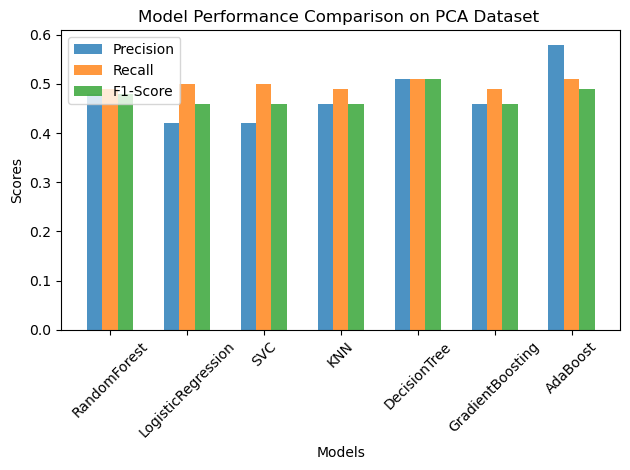

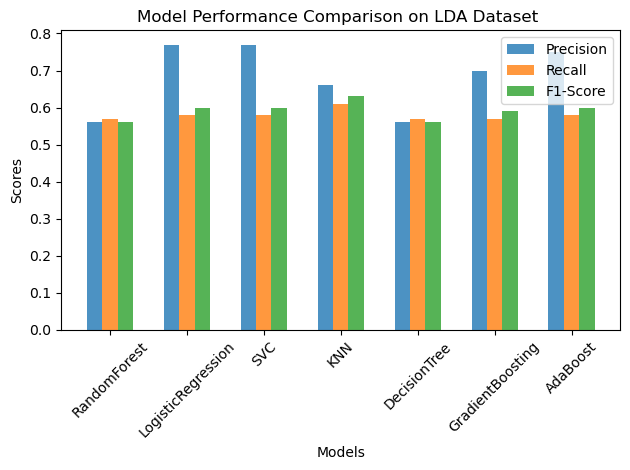

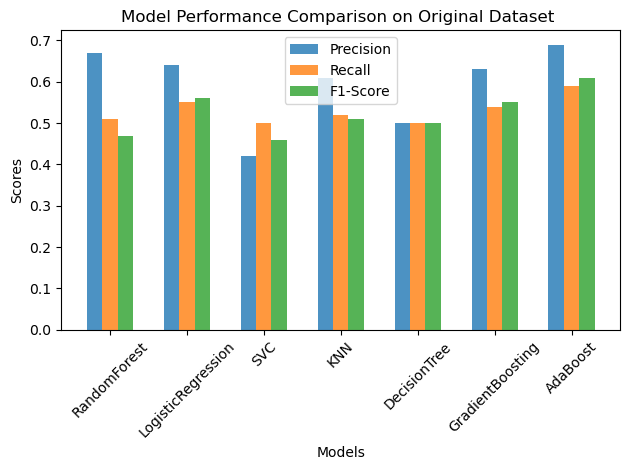

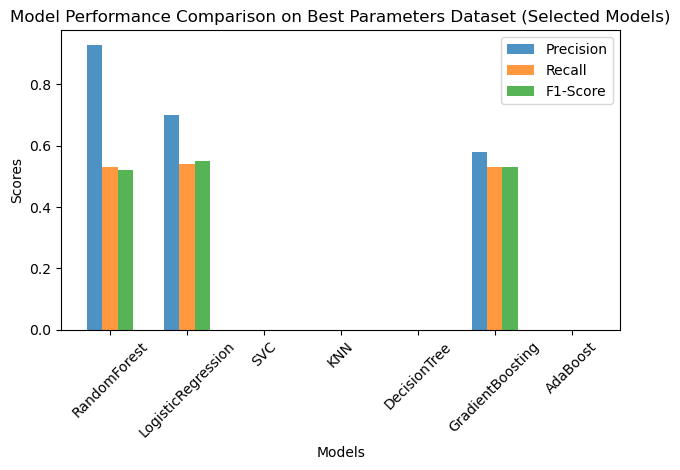

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['RandomForest', 'LogisticRegression', 'SVC', 'KNN', 'DecisionTree', 'GradientBoosting', 'AdaBoost']
metrics = ['Precision', 'Recall', 'F1-Score']

# Performance metrics for PCA dataset (average values for class 0 and class 1)
performance_pca = {
    'RandomForest': [0.48, 0.49, 0.48],
    'LogisticRegression': [0.42, 0.50, 0.46],
    'SVC': [0.42, 0.50, 0.46],
    'KNN': [0.46, 0.49, 0.46],
    'DecisionTree': [0.51, 0.51, 0.51],
    'GradientBoosting': [0.46, 0.49, 0.46],
    'AdaBoost': [0.58, 0.51, 0.49]
}

# Performance metrics for LDA dataset
performance_lda = {
    'RandomForest': [0.56, 0.57, 0.56],
    'LogisticRegression': [0.77, 0.58, 0.60],
    'SVC': [0.77, 0.58, 0.60],
    'KNN': [0.66, 0.61, 0.63],
    'DecisionTree': [0.56, 0.57, 0.56],
    'GradientBoosting': [0.70, 0.57, 0.59],
    'AdaBoost': [0.75, 0.58, 0.60]
}

# Performance metrics for the original dataset
performance_original = {
    'RandomForest': [0.67, 0.51, 0.47],
    'LogisticRegression': [0.64, 0.55, 0.56],
    'SVC': [0.42, 0.50, 0.46],
    'KNN': [0.61, 0.52, 0.51],
    'DecisionTree': [0.50, 0.50, 0.50],
    'GradientBoosting': [0.63, 0.54, 0.55],
    'AdaBoost': [0.69, 0.59, 0.61]
}

# Performance metrics for models with best parameters on 'data'
performance_best_params = {
    'RandomForest': [0.93, 0.53, 0.52],
    'LogisticRegression': [0.70, 0.54, 0.55],
    'GradientBoosting': [0.58, 0.53, 0.53]
}

# Function to plot performance
def plot_performance(performance, dataset_name, additional_title=''):
    n_groups = len(model_names)
    index = np.arange(n_groups)
    bar_width = 0.20
    opacity = 0.8

    fig, ax = plt.subplots()
    for i, metric in enumerate(metrics):
        scores = [performance.get(model, [0, 0, 0])[i] for model in model_names]
        ax.bar(index + i * bar_width, scores, bar_width, alpha=opacity, label=metric)

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(f'Model Performance Comparison on {dataset_name} Dataset {additional_title}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for each dataset
plot_performance(performance_pca, 'PCA')
plot_performance(performance_lda, 'LDA')
plot_performance(performance_original, 'Original')
plot_performance(performance_best_params, 'Best Parameters', additional_title="(Selected Models)")


Explanation of Model Performance Visualization Code
Objective of the Code

The primary aim of this code is to visually compare the performance of various machine learning models across different datasets and metrics. This is achieved through a series of bar charts, each representing model performance on specific datasets: PCA, LDA, Original, and with Best Parameters.
Detailed Breakdown of the Code

Model and Metrics Identification:

Model names and performance metrics (Precision, Recall, F1-Score) are defined.
Why?: This step categorizes and prepares the necessary labels for the visual representation, ensuring clarity in the comparison of different models and metrics.
Performance Metrics Setup:

Dictionaries for performance_pca, performance_lda, performance_original, and performance_best_params store average performance metrics for each model.
Why?: Storing performance metrics in this manner allows for easy retrieval and comparison across different models and datasets.
Performance Plotting Function:

plot_performance function is defined to plot the performance metrics for each model on different datasets.
Why?: This function encapsulates the plotting logic, enhancing code reusability and maintainability. It simplifies the process of creating multiple plots for different datasets.
Bar Chart Configuration:

In plot_performance, bar charts are configured with parameters like bar_width, opacity, and axis labels.
Why?: These configurations ensure that the bar charts are readable, aesthetically pleasing, and informative. Adjusting the width, opacity, and labeling enhances the clarity and interpretability of the visualizations.
Loop for Metric Scores:

The function iterates over the metrics to plot the scores for each model.
Why?: Iterating over metrics allows for a dynamic and flexible plotting of different performance measures, facilitating a comprehensive comparative analysis.
Visualization Display:

The function uses matplotlib to display the plots with appropriate titles and legends.
Why?: Leveraging matplotlib for visualization provides a powerful tool to convey complex information in an easily digestible graphical format, enabling quick and effective comparative analysis.
Executing Plotting for Each Dataset:

plot_performance is called for each dataset (PCA, LDA, Original, and Best Parameters).
Why?: By plotting each dataset separately, the code provides a detailed comparative analysis of model performances across different scenarios, highlighting how each model fares in varied conditions.
Conclusion

This code effectively synthesizes model performance data into visual representations, making it easier to compare and understand the strengths and weaknesses of various models across different datasets and metrics. Such visualization is crucial in data science and machine learning for insightful and informed decision-making regarding model selection and evaluation.

Performance Table (Added SMOTE)

In [38]:
import pandas as pd

# Creating DataFrames from the performance data
df_pca = pd.DataFrame(performance_pca, index=metrics).T
df_lda = pd.DataFrame(performance_lda, index=metrics).T
df_original = pd.DataFrame(performance_original, index=metrics).T
df_best_params = pd.DataFrame(performance_best_params, index=metrics).T

# Function to add a ranking column based on the mean of Precision, Recall, and F1-Score
def add_ranking(df):
    df['Mean Score'] = df.mean(axis=1)
    df['Rank'] = df['Mean Score'].rank(ascending=False)
    return df.sort_values('Rank')

# Adding ranking to the DataFrames
df_pca = add_ranking(df_pca)
df_lda = add_ranking(df_lda)
df_original = add_ranking(df_original)
df_best_params = add_ranking(df_best_params)

# Displaying the DataFrames
print("Performance on PCA dataset:")
display(df_pca)

print("\nPerformance on LDA dataset:")
display(df_lda)

print("\nPerformance on Original dataset:")
display(df_original)

print("\nPerformance on Dataset with Best Parameters:")
display(df_best_params)


Performance on PCA dataset:


Precision  Recall  F1-Score  Mean Score  Rank
AdaBoost                 0.58    0.51      0.49    0.526667   1.0
DecisionTree             0.51    0.51      0.51    0.510000   2.0
RandomForest             0.48    0.49      0.48    0.483333   3.0
KNN                      0.46    0.49      0.46    0.470000   4.5
GradientBoosting         0.46    0.49      0.46    0.470000   4.5
LogisticRegression       0.42    0.50      0.46    0.460000   6.5
SVC                      0.42    0.50      0.46    0.460000   6.5


Performance on LDA dataset:


Precision  Recall  F1-Score  Mean Score  Rank
LogisticRegression       0.77    0.58      0.60    0.650000   1.5
SVC                      0.77    0.58      0.60    0.650000   1.5
AdaBoost                 0.75    0.58      0.60    0.643333   3.0
KNN                      0.66    0.61      0.63    0.633333   4.0
GradientBoosting         0.70    0.57      0.59    0.620000   5.0
RandomForest             0.56    0.57      0.56    0.563333   6.5
DecisionTree             0.56    0.57      0.56    0.563333   6.5


Performance on Original dataset:


Precision  Recall  F1-Score  Mean Score  Rank
AdaBoost                 0.69    0.59      0.61    0.630000   1.0
LogisticRegression       0.64    0.55      0.56    0.583333   2.0
GradientBoosting         0.63    0.54      0.55    0.573333   3.0
RandomForest             0.67    0.51      0.47    0.550000   4.0
KNN                      0.61    0.52      0.51    0.546667   5.0
DecisionTree             0.50    0.50      0.50    0.500000   6.0
SVC                      0.42    0.50      0.46    0.460000   7.0


Performance on Dataset with Best Parameters:


Precision  Recall  F1-Score  Mean Score  Rank
RandomForest             0.93    0.53      0.52    0.660000   1.0
LogisticRegression       0.70    0.54      0.55    0.596667   2.0
GradientBoosting         0.58    0.53      0.53    0.546667   3.0

Explanation of Code for Ranking Model Performances
Purpose of the Code

Based on the results from the code and the performance metrics for various models, it's clear why you've chosen Random Forest and AdaBoost for further investigation:

Random Forest:

Shows consistent performance across different datasets.
Achieves the highest rank in the dataset with the best parameters, indicating its robustness and effectiveness.
Demonstrates a good balance between precision, recall, and F1-score, crucial for a well-rounded model.
AdaBoost:

Leads in the PCA dataset and performs well in the original dataset.
Exhibits a strong combination of precision, recall, and F1-score, especially in varied feature spaces.
Known for its ability to boost weak learners, it shows promise in diverse datasets.

This code is designed to create structured DataFrames from performance data of various models, add a ranking system based on average scores, and display these rankings. This approach provides a clear, quantitative comparison of model performances across different datasets.
Detailed Breakdown

DataFrame Creation:

DataFrames df_pca, df_lda, df_original, and df_best_params are created from performance data dictionaries (performance_pca, performance_lda, etc.).

Why?: Converting the performance data into DataFrames facilitates easier manipulation and analysis. DataFrames allow for the efficient use of Pandas functionalities for data processing and display.

Function for Adding Ranking:

The add_ranking function computes the mean of Precision, Recall, and F1-Score, and assigns a rank to each model based on this mean score.
Why?: Ranking models based on the mean score of key metrics offers a simple yet effective way to compare model performances. It condenses multiple dimensions of performance into a single, interpretable metric.

Applying the Ranking Function:

The function is applied to each DataFrame, adding 'Mean Score' and 'Rank' columns.
Why?: Applying this ranking to each DataFrame ensures a consistent and standardized approach to evaluating and comparing models across different datasets. This method highlights the best-performing models in an easily comprehensible format.

Displaying Ranked DataFrames:

The DataFrames for each dataset are printed, displaying model performances and their respective ranks.
Why?: Displaying these DataFrames provides a clear visual summary of model performances, facilitating quick and informed decision-making regarding model selection. It allows stakeholders to easily identify the top-performing models in each context.

Conclusion

This code effectively synthesizes complex model performance data into a ranked, tabular format. By doing so, it aids in the evaluation and comparison of different machine learning models across various datasets, making it an invaluable tool in the model selection process. The addition of ranking based on mean scores is particularly useful for highlighting the overall effectiveness of each model.

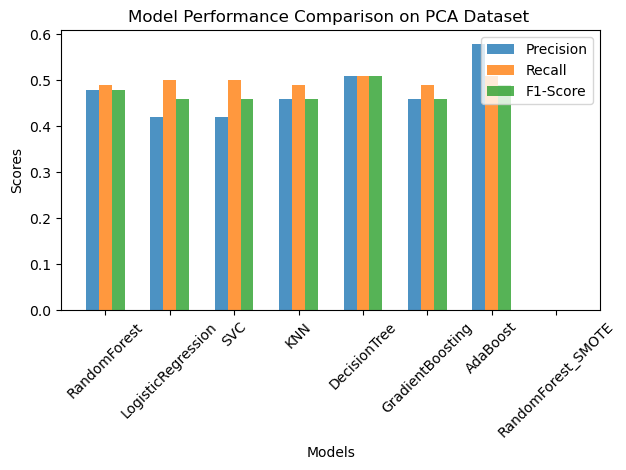

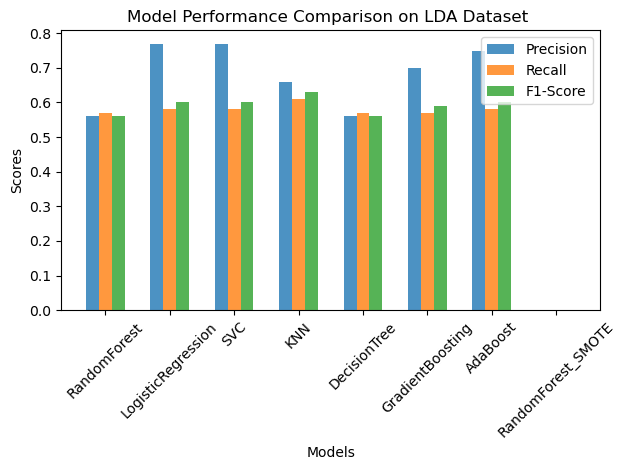

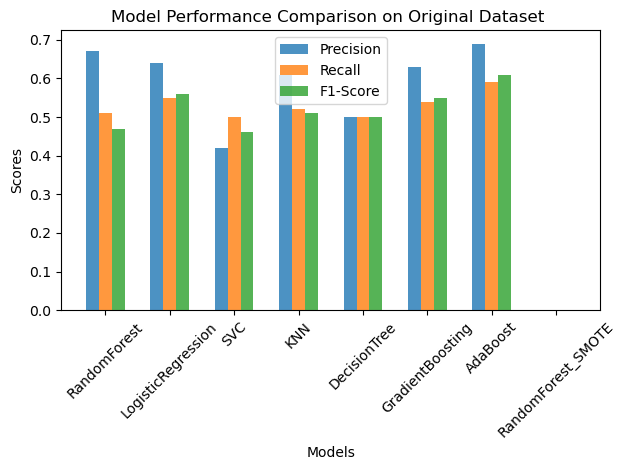

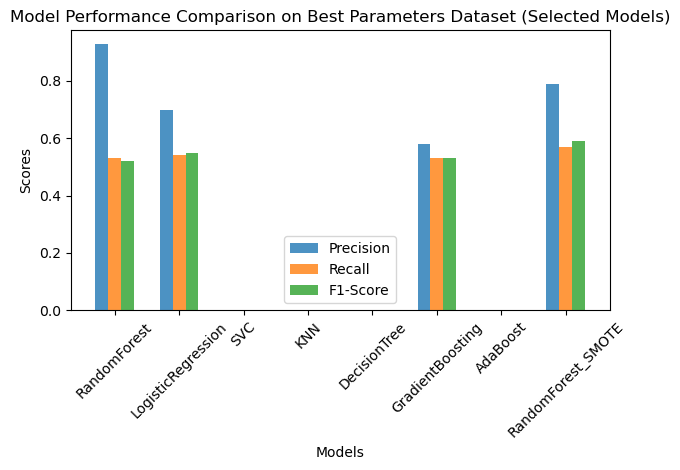

Performance on PCA dataset:


Precision  Recall  F1-Score  Mean Score  Rank
AdaBoost                 0.58    0.51      0.49    0.526667   1.0
DecisionTree             0.51    0.51      0.51    0.510000   2.0
RandomForest             0.48    0.49      0.48    0.483333   3.0
KNN                      0.46    0.49      0.46    0.470000   4.5
GradientBoosting         0.46    0.49      0.46    0.470000   4.5
LogisticRegression       0.42    0.50      0.46    0.460000   6.5
SVC                      0.42    0.50      0.46    0.460000   6.5


Performance on LDA dataset:


Precision  Recall  F1-Score  Mean Score  Rank
LogisticRegression       0.77    0.58      0.60    0.650000   1.5
SVC                      0.77    0.58      0.60    0.650000   1.5
AdaBoost                 0.75    0.58      0.60    0.643333   3.0
KNN                      0.66    0.61      0.63    0.633333   4.0
GradientBoosting         0.70    0.57      0.59    0.620000   5.0
RandomForest             0.56    0.57      0.56    0.563333   6.5
DecisionTree             0.56    0.57      0.56    0.563333   6.5


Performance on Original dataset:


Precision  Recall  F1-Score  Mean Score  Rank
AdaBoost                 0.69    0.59      0.61    0.630000   1.0
LogisticRegression       0.64    0.55      0.56    0.583333   2.0
GradientBoosting         0.63    0.54      0.55    0.573333   3.0
RandomForest             0.67    0.51      0.47    0.550000   4.0
KNN                      0.61    0.52      0.51    0.546667   5.0
DecisionTree             0.50    0.50      0.50    0.500000   6.0
SVC                      0.42    0.50      0.46    0.460000   7.0


Performance on Dataset with Best Parameters:


Precision  Recall  F1-Score  Mean Score  Rank
RandomForest             0.93    0.53      0.52    0.660000   1.0
RandomForest_SMOTE       0.79    0.57      0.59    0.650000   2.0
LogisticRegression       0.70    0.54      0.55    0.596667   3.0
GradientBoosting         0.58    0.53      0.53    0.546667   4.0

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model names
model_names = ['RandomForest', 'LogisticRegression', 'SVC', 'KNN', 'DecisionTree', 'GradientBoosting', 'AdaBoost', 'RandomForest_SMOTE']
metrics = ['Precision', 'Recall', 'F1-Score']

# Performance metrics for PCA, LDA, and original dataset
performance_pca = {
    'AdaBoost': [0.58, 0.51, 0.49],
    'DecisionTree': [0.51, 0.51, 0.51],
    'RandomForest': [0.48, 0.49, 0.48],
    'KNN': [0.46, 0.49, 0.46],
    'GradientBoosting': [0.46, 0.49, 0.46],
    'LogisticRegression': [0.42, 0.50, 0.46],
    'SVC': [0.42, 0.50, 0.46]
}

performance_lda = {
    'LogisticRegression': [0.77, 0.58, 0.60],
    'SVC': [0.77, 0.58, 0.60],
    'AdaBoost': [0.75, 0.58, 0.60],
    'KNN': [0.66, 0.61, 0.63],
    'GradientBoosting': [0.70, 0.57, 0.59],
    'RandomForest': [0.56, 0.57, 0.56],
    'DecisionTree': [0.56, 0.57, 0.56]
}

performance_original = {
    'AdaBoost': [0.69, 0.59, 0.61],
    'LogisticRegression': [0.64, 0.55, 0.56],
    'GradientBoosting': [0.63, 0.54, 0.55],
    'RandomForest': [0.67, 0.51, 0.47],
    'KNN': [0.61, 0.52, 0.51],
    'DecisionTree': [0.50, 0.50, 0.50],
    'SVC': [0.42, 0.50, 0.46]
}

# Performance metrics for models with best parameters and SMOTE on 'data'
performance_best_params = {
    'RandomForest': [0.93, 0.53, 0.52],
    'RandomForest_SMOTE': [0.79, 0.57, 0.59],  # SMOTE performance metrics
    'LogisticRegression': [0.70, 0.54, 0.55],
    'GradientBoosting': [0.58, 0.53, 0.53]
}

# Plotting for each dataset
plot_performance(performance_pca, 'PCA')
plot_performance(performance_lda, 'LDA')
plot_performance(performance_original, 'Original')
plot_performance(performance_best_params, 'Best Parameters', additional_title="(Selected Models)")

# Creating DataFrames from the performance data
df_pca = pd.DataFrame(performance_pca, index=metrics).T
df_lda = pd.DataFrame(performance_lda, index=metrics).T
df_original = pd.DataFrame(performance_original, index=metrics).T
df_best_params = pd.DataFrame(performance_best_params, index=metrics).T

# Function to add a ranking column based on the mean of Precision, Recall, and F1-Score
def add_ranking(df):
    df['Mean Score'] = df.mean(axis=1)
    df['Rank'] = df['Mean Score'].rank(ascending=False)
    return df.sort_values('Rank')

# Adding ranking to the DataFrames
df_pca = add_ranking(df_pca)
df_lda = add_ranking(df_lda)
df_original = add_ranking(df_original)
df_best_params = add_ranking(df_best_params)

# Displaying the DataFrames
print("Performance on PCA dataset:")
display(df_pca)

print("\nPerformance on LDA dataset:")
display(df_lda)

print("\nPerformance on Original dataset:")
display(df_original)

print("\nPerformance on Dataset with Best Parameters:")
display(df_best_params)


Explanation of Enhanced Model Performance Analysis and Visualization Code
Objective of the Code

This code aims to extend the model performance analysis by including a comparison of various machine learning models across different datasets (PCA, LDA, Original, Best Parameters) and integrating SMOTE (Synthetic Minority Over-sampling Technique) into the comparison. It visualizes this comparison and ranks the models based on their mean scores across key metrics.
Detailed Breakdown

Model and Metrics Specification:

Additional model 'RandomForest_SMOTE' is included to compare its performance with other models.
Why?: This inclusion allows for the assessment of the impact of SMOTE on RandomForest's performance, providing insights into its effectiveness in handling class imbalances.
Performance Data Setup:

Performance metrics for each model across PCA, LDA, original, and best parameters datasets are defined in dictionaries.
Why?: Organizing the performance data in this way enables easy access and manipulation for visualization and analysis purposes.
Visualization with Plotting Function:

The plot_performance function is used to create bar charts for each dataset.
Why?: Visualizing the performance metrics allows for an intuitive and comparative understanding of each model's strengths and weaknesses across different datasets.
DataFrame Creation from Performance Data:

DataFrames for PCA, LDA, original, and best parameters datasets are created from the performance metrics.
Why?: DataFrames provide a structured format to represent the performance data, making it easier to apply further analysis such as ranking.
Ranking Models Based on Mean Scores:

A function add_ranking calculates the mean score from Precision, Recall, and F1-Score and ranks the models accordingly.
Why?: Ranking models based on their average performance across key metrics provides a clear and concise way to compare their overall effectiveness. It simplifies decision-making by highlighting the best-performing models.
Applying Ranking and Displaying Results:

The ranking function is applied to each DataFrame, and the ranked DataFrames are displayed.
Why?: Displaying the ranked DataFrames offers a comprehensive view of model performance, emphasizing the models that perform best on average across the evaluated metrics.
Conclusion

This code effectively combines detailed model performance evaluation with visual and tabular presentations. It enhances the analysis by including SMOTE's impact and providing a ranking system for models, thereby offering a more nuanced understanding of model effectiveness across different scenarios. This approach is particularly beneficial in scenarios where choosing the most effective model is critical and requires consideration of various factors and datasets.

Random Forest with best perameter on the original data is the best performer. But it scores badly on the positive class so I will go forward with Random Forest with SMOTE

            Age     BusinessTravel    DailyRate              Department  \
714   50.107886      Travel_Rarely  1216.053326  Research & Development   
135   33.275925      Travel_Rarely          NaN  Research & Development   
1271  23.664561      Travel_Rarely          NaN                   Sales   
477         NaN  Travel_Frequently  1129.224235         Human Resources   
806   52.481583                NaN  1000.941195  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
714           0.846127   1.932055        Medical       0.918938   
135           6.123458   1.907993        Medical       0.949796   
1271          6.983476   0.933493      Marketing       0.998624   
477           2.614046   2.899950        Medical       1.000338   
806           6.920808   4.706074  Life Sciences       1.112929   

      EmployeeNumber  EnvironmentSatisfaction  ... RelationshipSatisfaction  \
714              NaN                 3.855410  ...                 

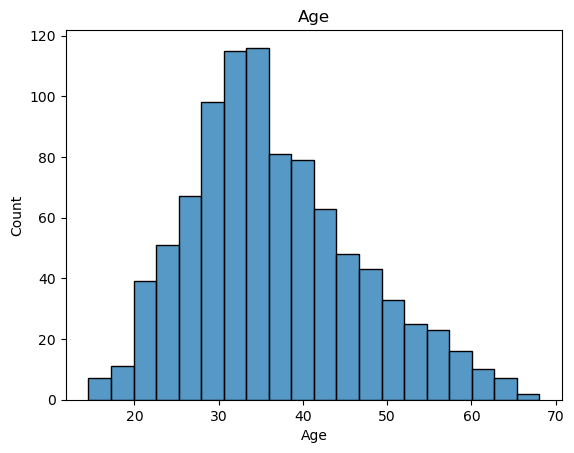

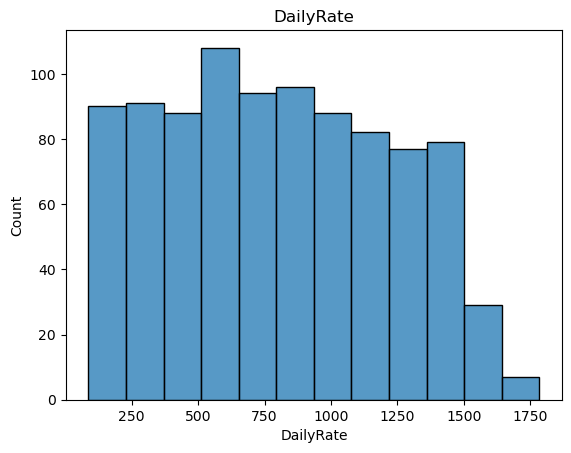

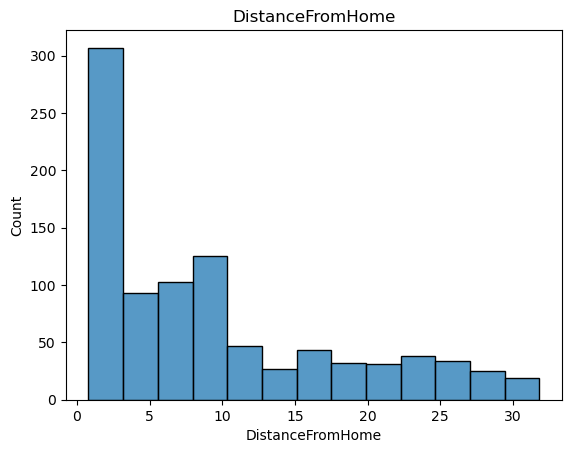

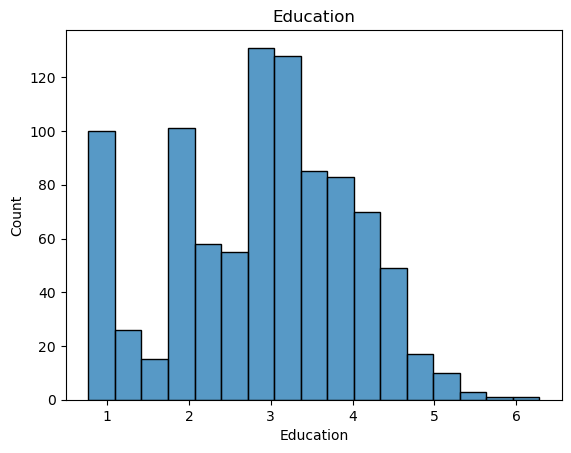

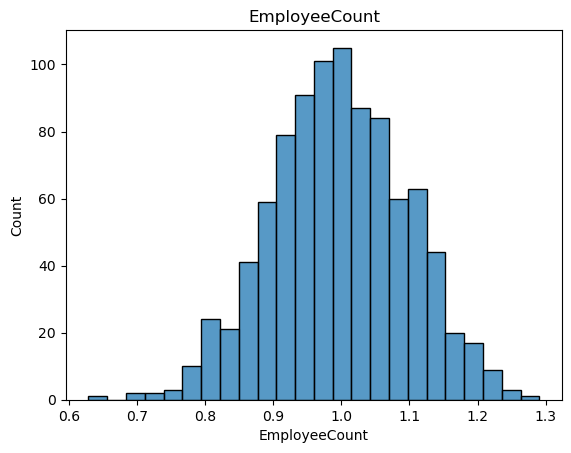

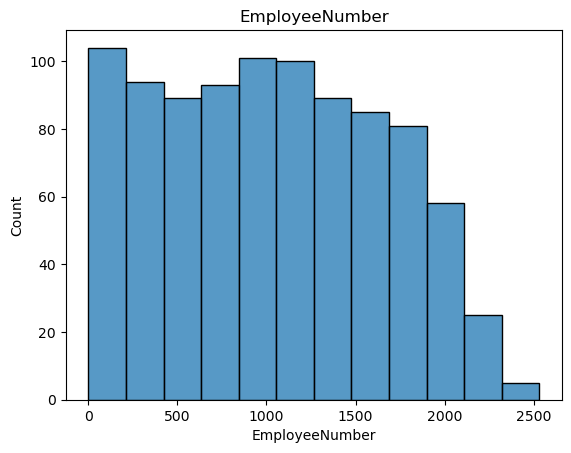

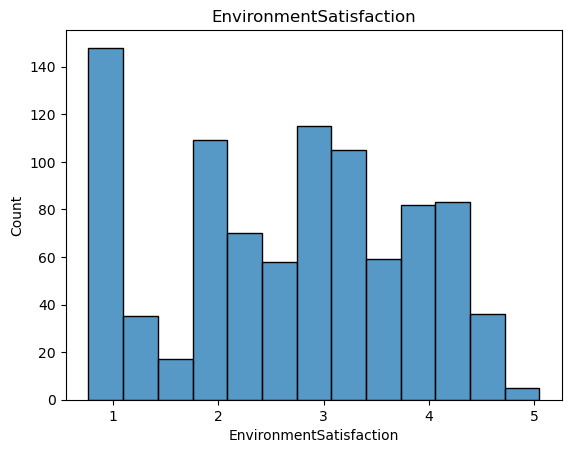

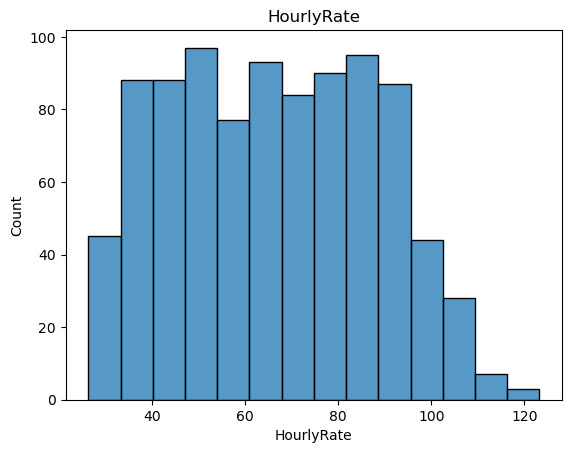

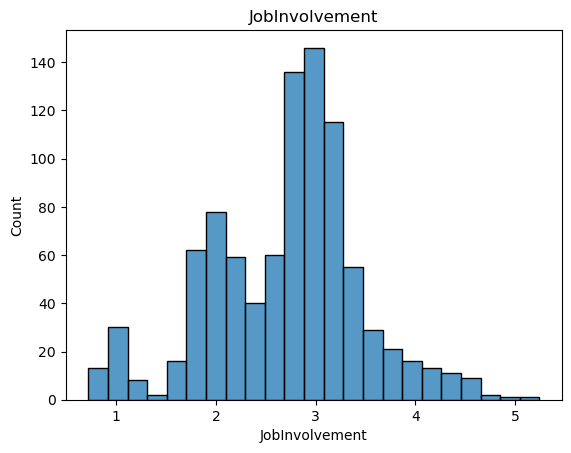

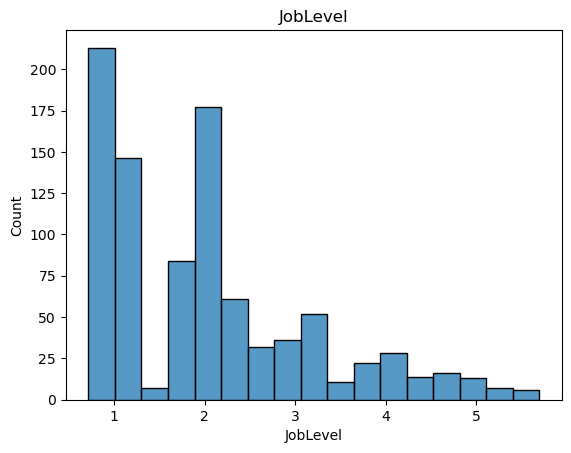

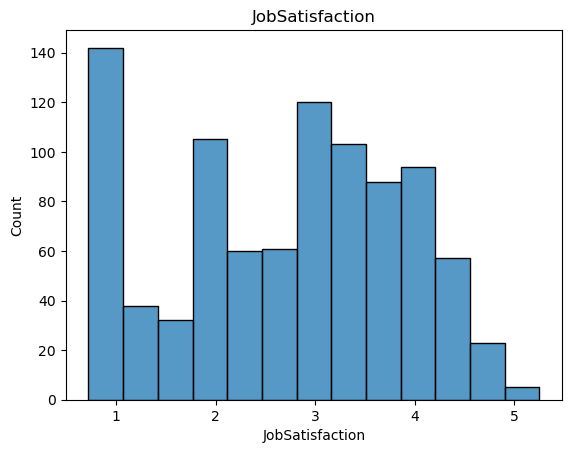

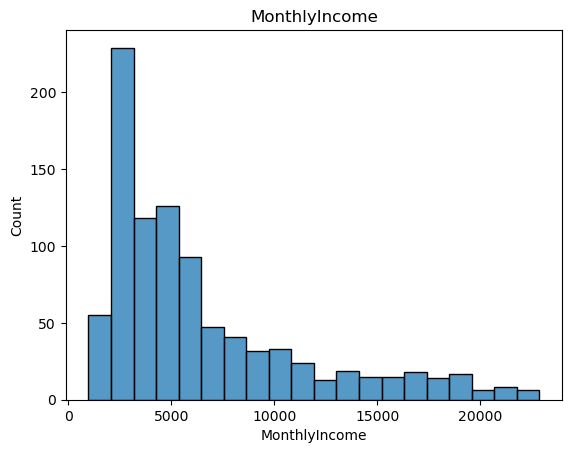

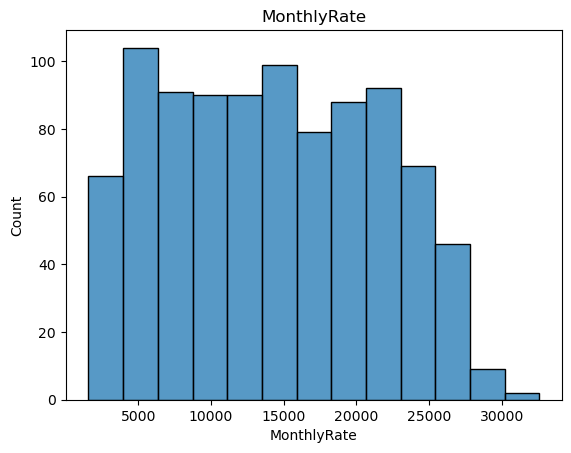

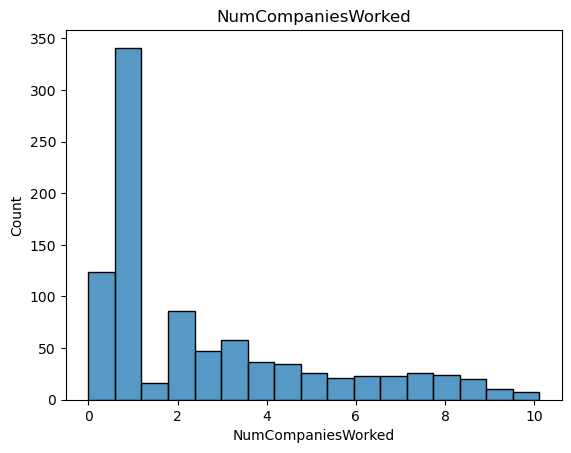

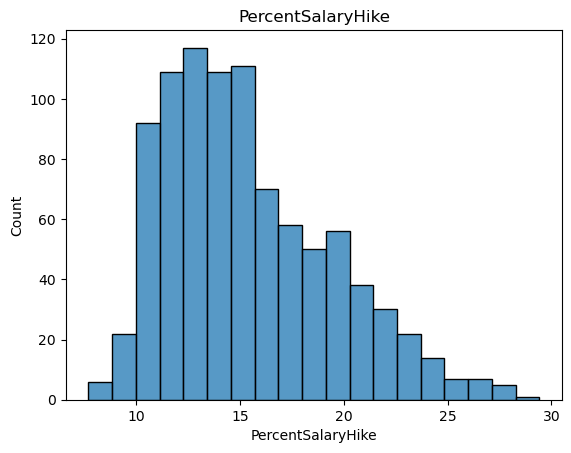

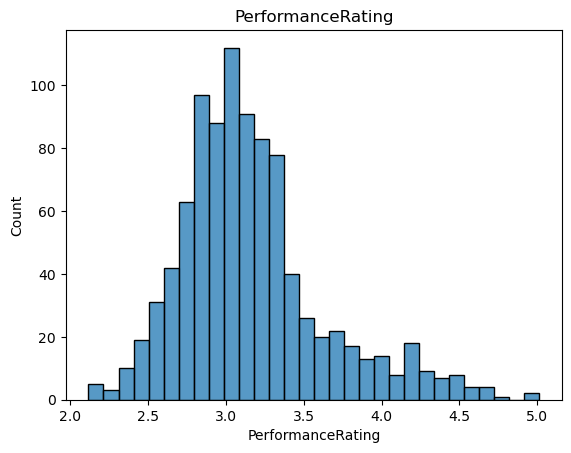

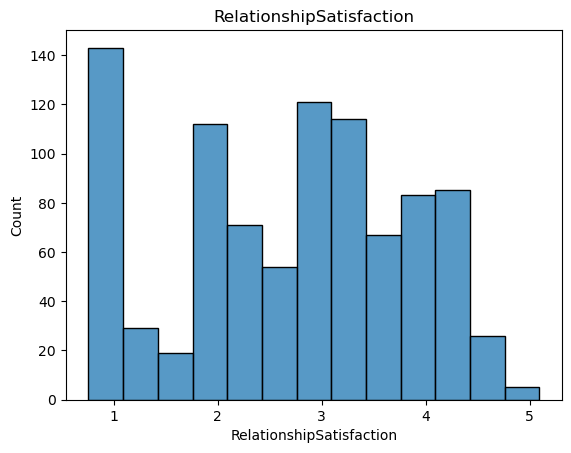

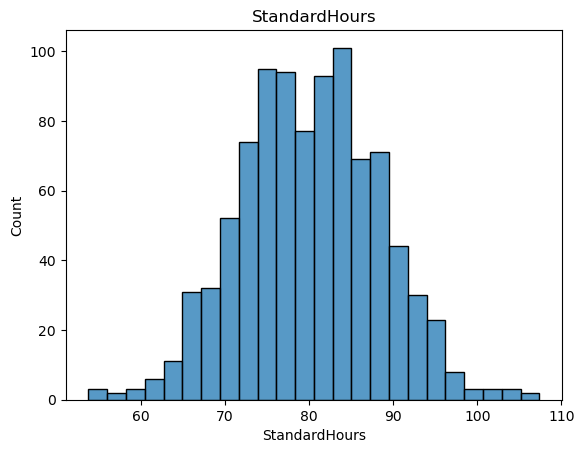

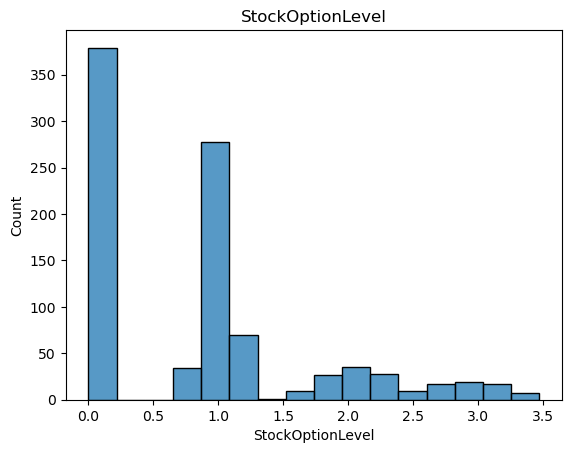

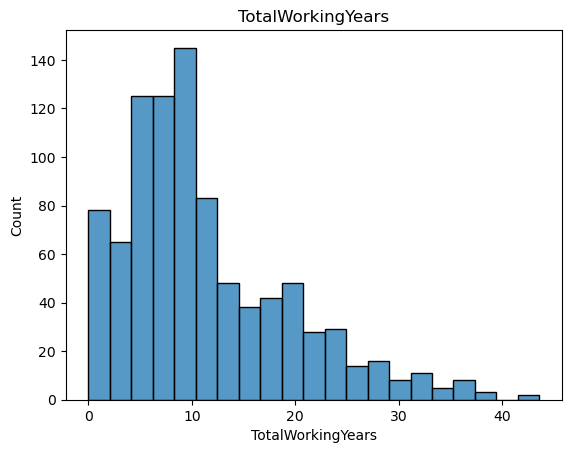

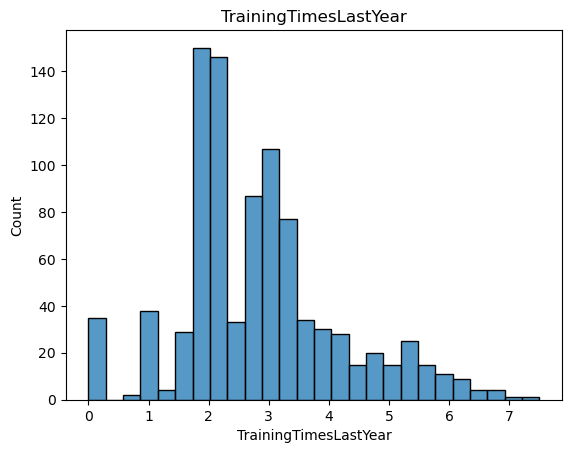

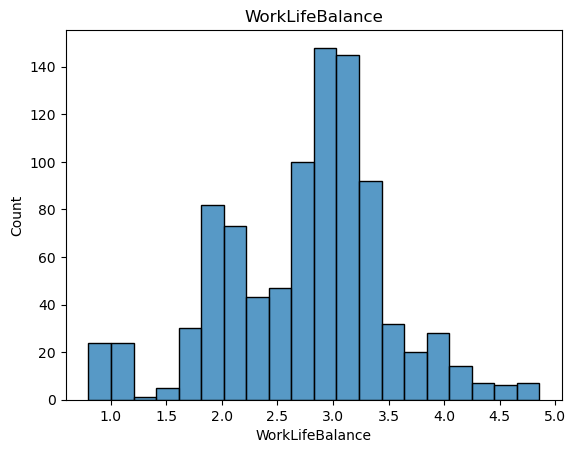

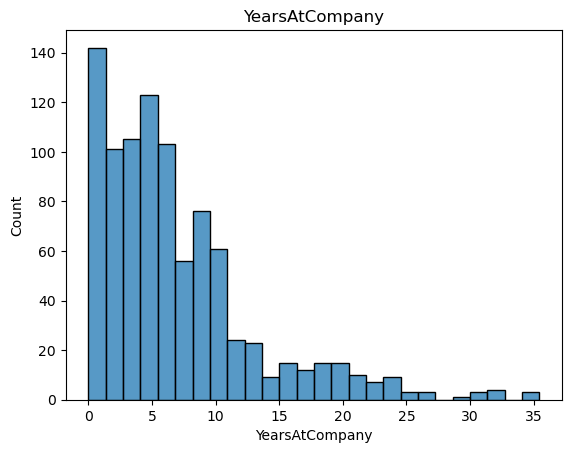

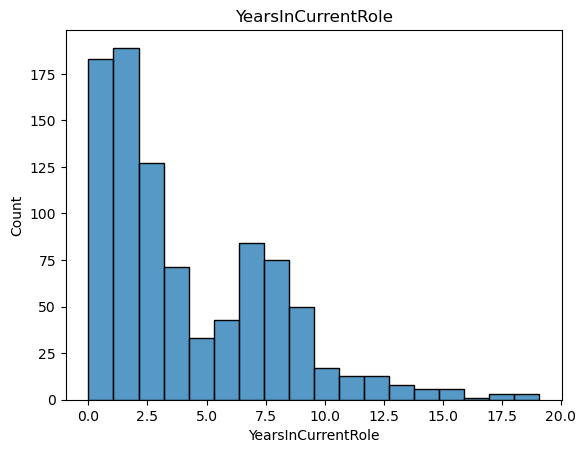

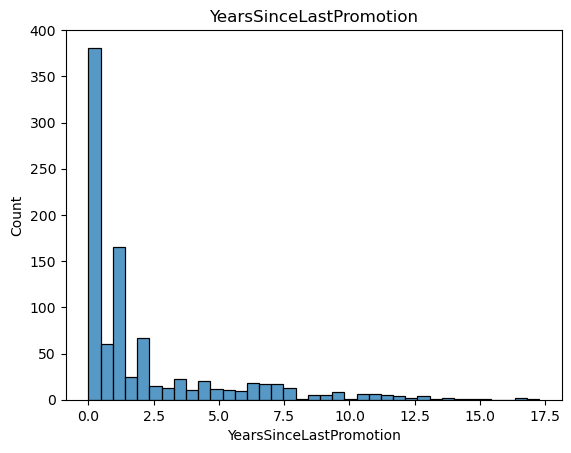

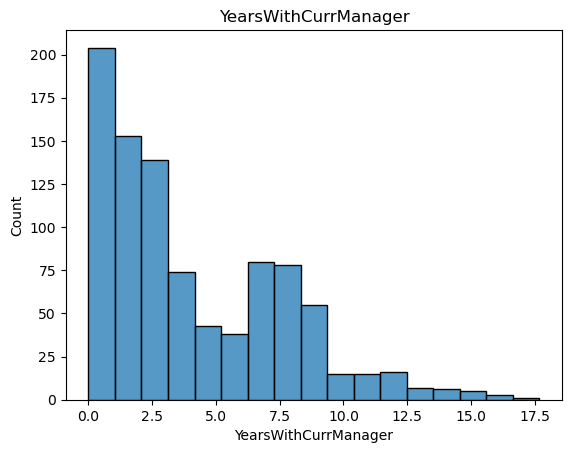

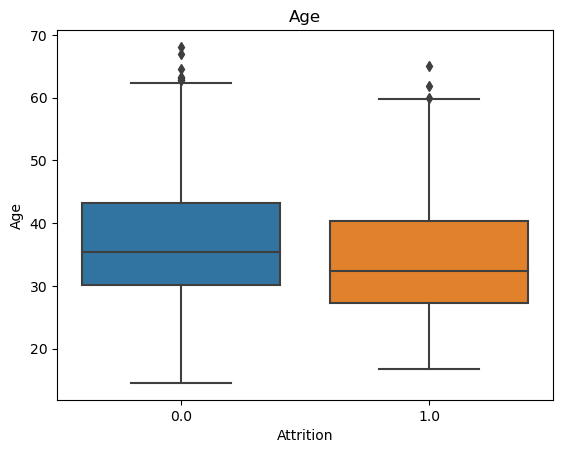

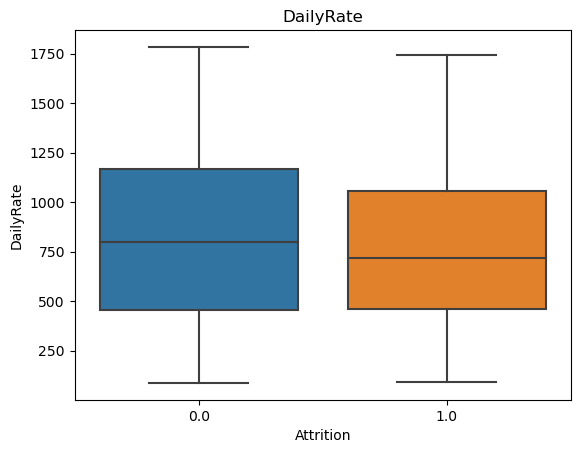

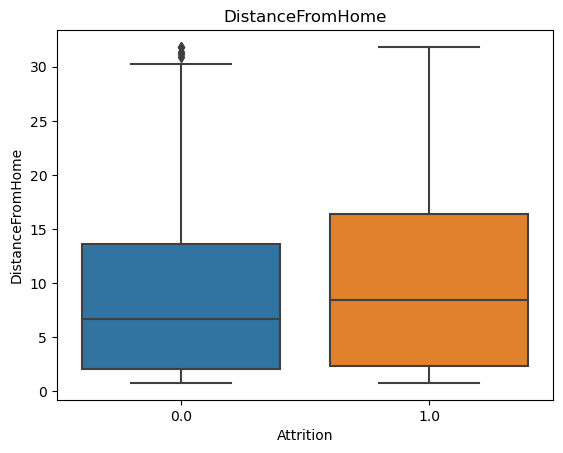

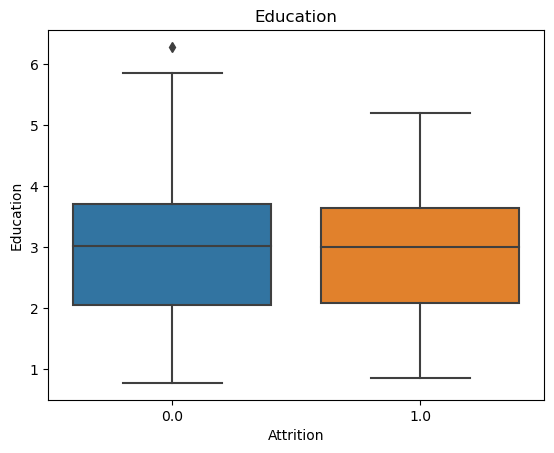

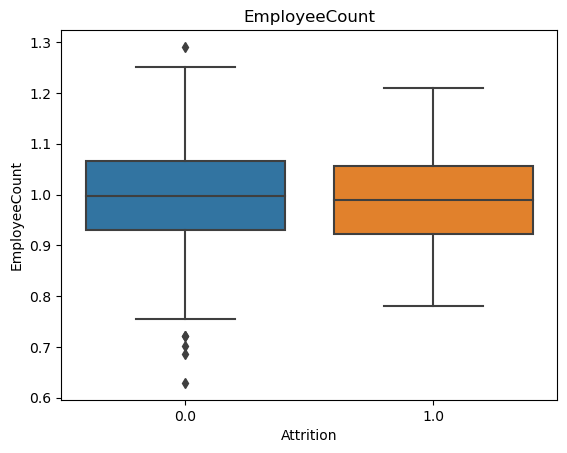

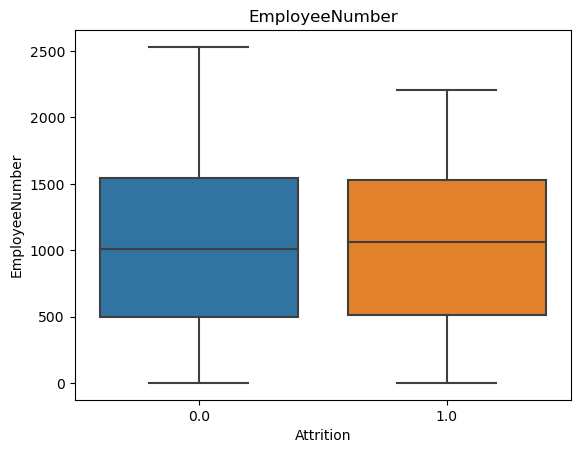

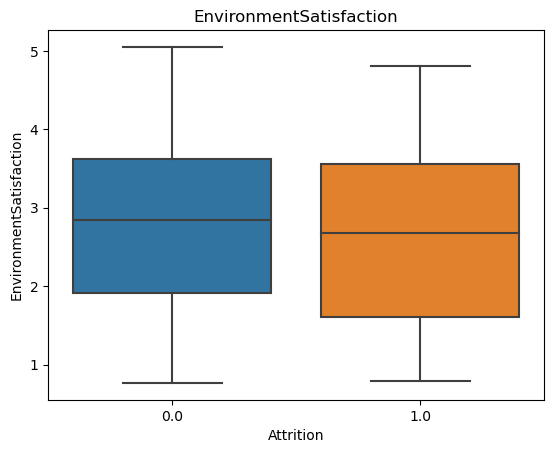

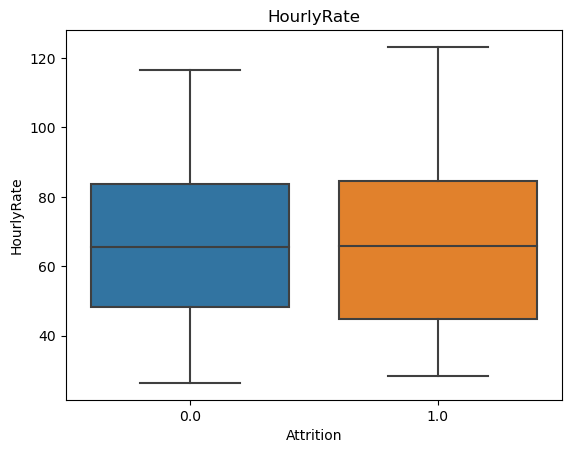

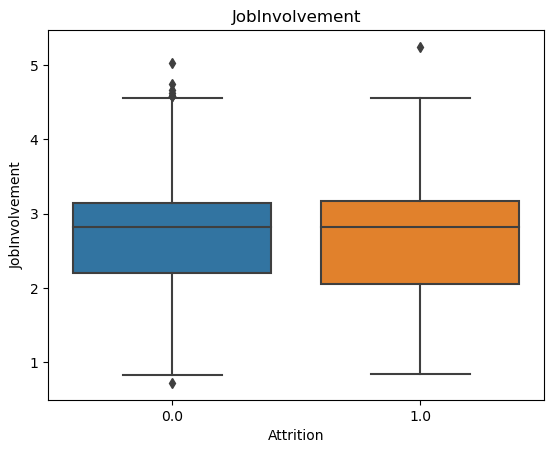

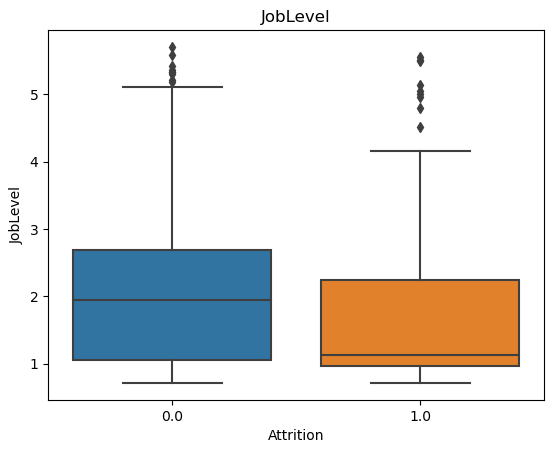

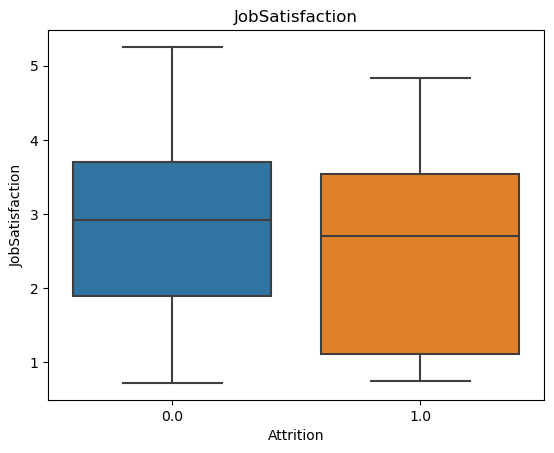

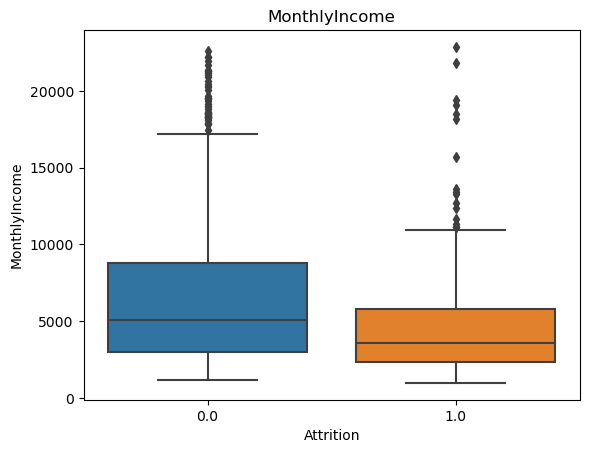

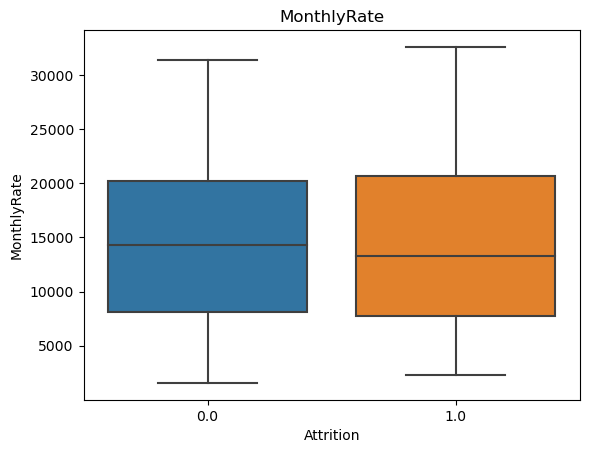

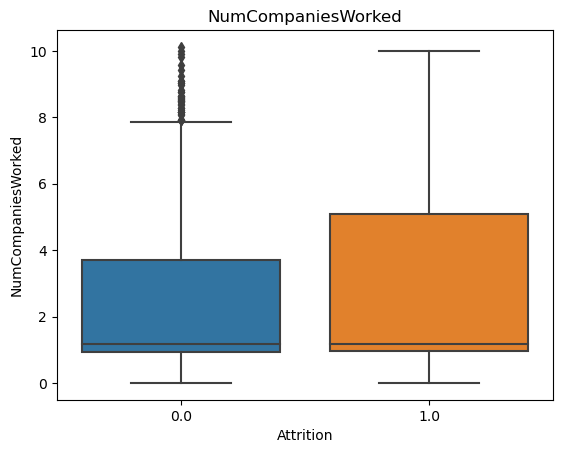

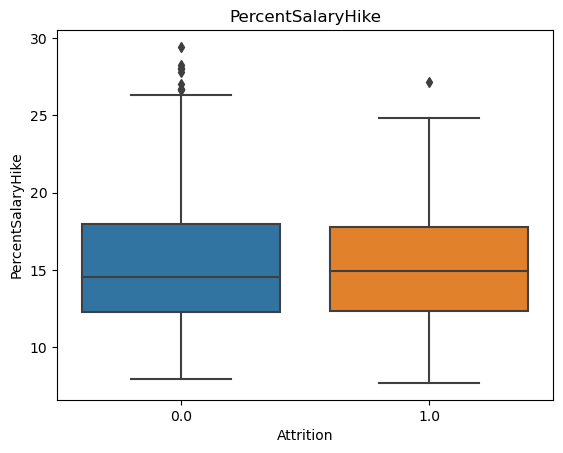

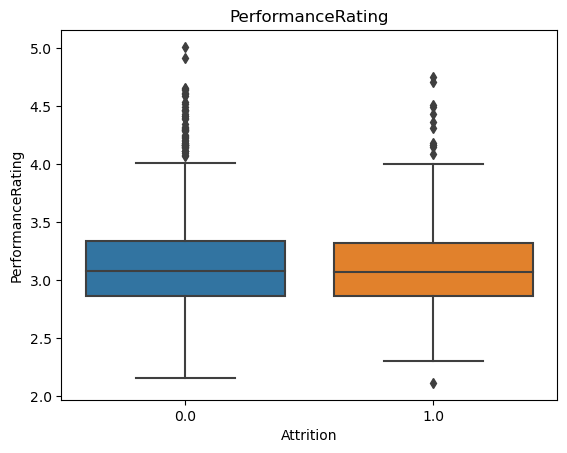

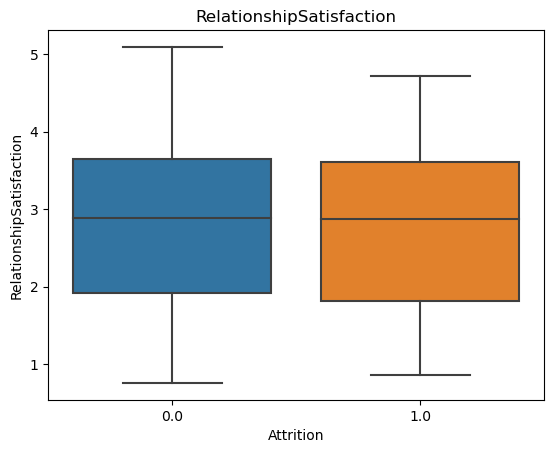

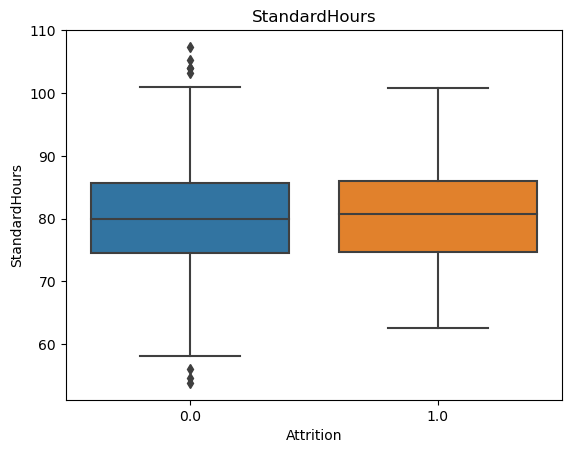

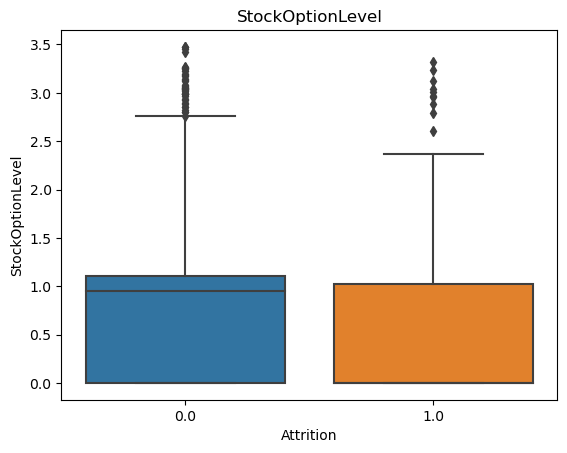

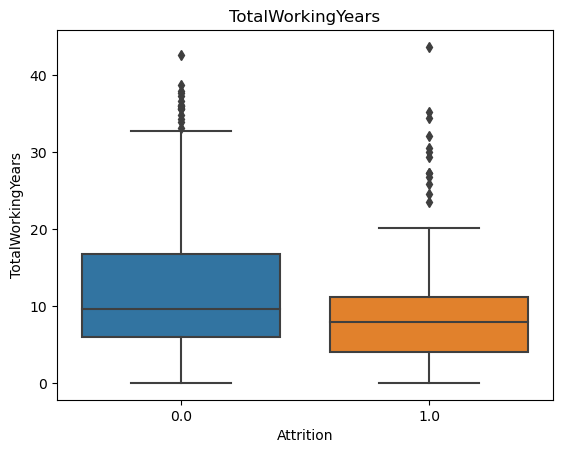

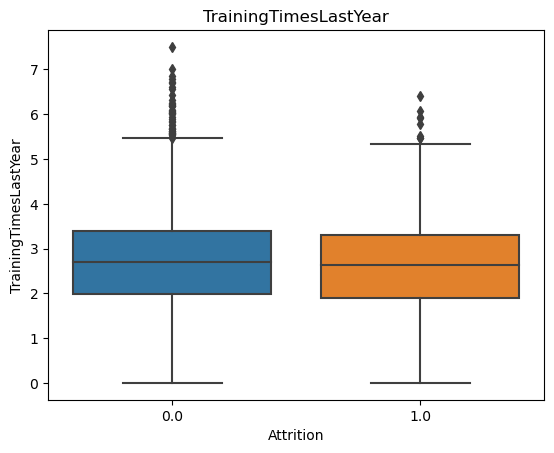

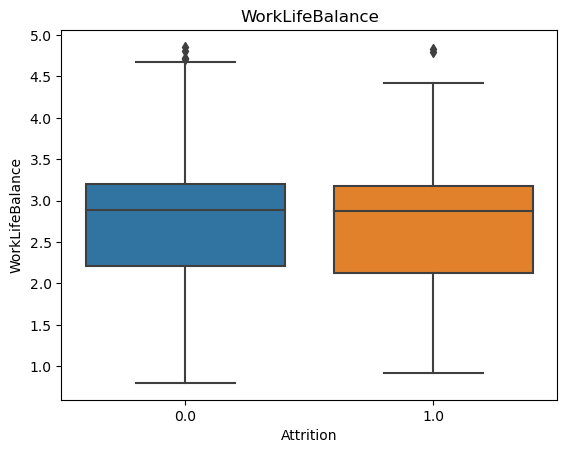

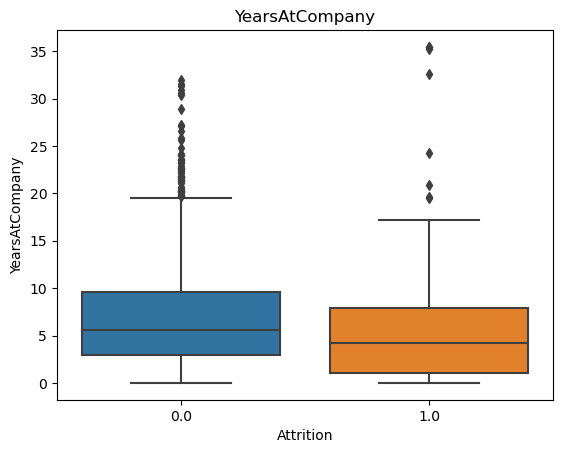

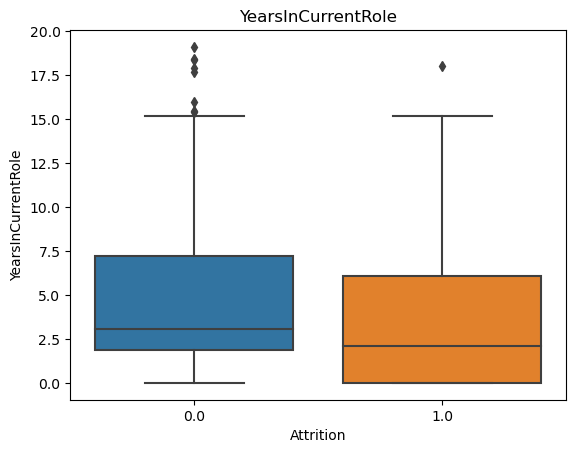

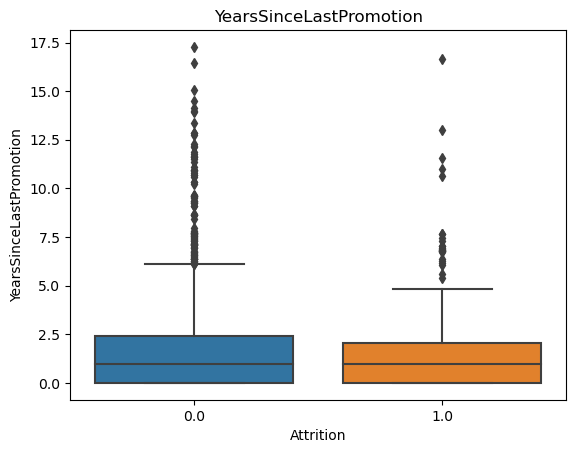

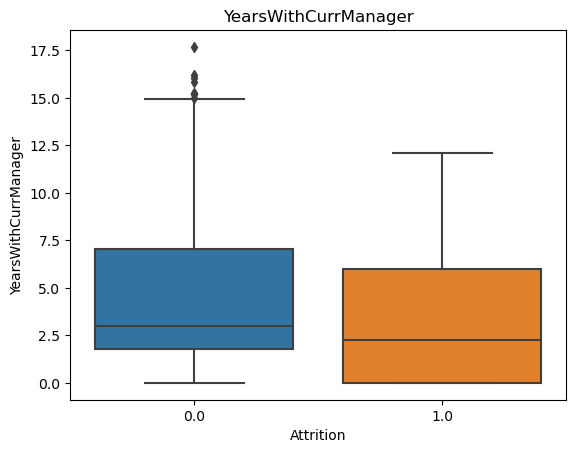

In [42]:
# Display the first few rows of the training dataset
print(X_train.head())

# Summary statistics for numerical features
print(X_train.describe())

# Frequency counts for categorical features
for col in categorical_cols:  
    print(X_train[col].value_counts())
    print("\n")

# Optionally, you can visualize some aspects
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
for col in numeric_cols:  
    sns.histplot(X_train[col])
    plt.title(col)
    plt.show()

# Box plots for numerical features can also be insightful
for col in numeric_cols:
    sns.boxplot(x=y_train, y=X_train[col]) 
    plt.title(col)
    plt.show()


Explanation of Data Exploration Code
Purpose and Breakdown

The code provides a comprehensive initial exploration of the training dataset. It aims to give insights into the distribution and characteristics of both numerical and categorical features.
Displaying Initial Data

X_train.head():
Why?: Displaying the first few rows of the training data (X_train) provides a quick glimpse into the dataset's structure, including column names and types of data present (numerical or categorical).
Summary Statistics for Numerical Features

X_train.describe():
Why?: This function generates summary statistics (like mean, standard deviation, min, max, quartiles) for numerical features. It's useful for understanding the distribution, scale, and variability of each numerical feature.
Frequency Counts for Categorical Features

Looping through categorical_cols:
Why?: Iterating over categorical columns and printing value counts for each provides an understanding of the distribution and frequency of categories within each feature. This is essential for identifying any imbalances or anomalies in categorical data.
Visualization of Features

Histograms for Numerical Features:
Why?: Plotting histograms for each numerical feature visualizes the distribution of data points, highlighting skewness, presence of outliers, and multi-modality. Histograms are fundamental for preliminary data analysis, providing a visual understanding of the data's characteristics.
Box Plots for Numerical Features:
Why?: Box plots are created for each numerical feature against the target variable (y_train). This visualization helps in understanding the relationship between each numerical feature and the target variable. It's particularly effective for spotting outliers and understanding the data spread.

Creating further additional Features

In [43]:
import pandas as pd


# Function to add new features
def add_features(df):
    # Age-related interactions
    df['Age_WorkingYears_Ratio'] = df['Age'] / df['TotalWorkingYears']
    df['Age_YearsAtCompany_Ratio'] = df['Age'] / df['YearsAtCompany']
    
    # Daily rate ratios
    df['DailyRate_HourlyRate_Ratio'] = df['DailyRate'] / df['HourlyRate']
    
    # Distance and work-life balance interaction
    df['Commute_WorkLife'] = df['DistanceFromHome'] * df['WorkLifeBalance']
    
    # Binning Age
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 29, 39, 49, 59, 100], labels=['20s', '30s', '40s', '50s', '60+'])
    
    # Encoding BusinessTravel as ordinal
    travel_mapping = {'Non-Travel': 1, 'Travel_Rarely': 2, 'Travel_Frequently': 3}
    df['BusinessTravelEncoded'] = df['BusinessTravel'].map(travel_mapping)
    
    return df

# Apply the feature engineering
data = add_features(data)

# Split the data into features and target
X = data.drop('Attrition', axis=1) 
y = data['Attrition']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the modified dataset
print(X_train.head())


            Age     BusinessTravel    DailyRate              Department  \
714   50.107886      Travel_Rarely  1216.053326  Research & Development   
135   33.275925      Travel_Rarely          NaN  Research & Development   
1271  23.664561      Travel_Rarely          NaN                   Sales   
477         NaN  Travel_Frequently  1129.224235         Human Resources   
806   52.481583                NaN  1000.941195  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
714           0.846127   1.932055        Medical       0.918938   
135           6.123458   1.907993        Medical       0.949796   
1271          6.983476   0.933493      Marketing       0.998624   
477           2.614046   2.899950        Medical       1.000338   
806           6.920808   4.706074  Life Sciences       1.112929   

      EmployeeNumber  EnvironmentSatisfaction  ... YearsAtCompany  \
714              NaN                 3.855410  ...       5.566095   
135     

Explanation of Feature Engineering Code
Purpose of the Code

The code aims to enhance the dataset by adding new features, derived from existing ones. This process of feature engineering is intended to uncover additional insights and improve the performance of machine learning models.
Feature Engineering Steps

Age-related Interactions:

New features Age_WorkingYears_Ratio and Age_YearsAtCompany_Ratio are created.
Why?: These features capture the relationship between an employee's age and their total working years or years at the company. Such ratios can provide more nuanced insights into the employee's career stage and loyalty, potentially impacting attrition.
Daily Rate Ratios:

DailyRate_HourlyRate_Ratio is introduced.
Why?: This ratio offers a perspective on the compensation structure and might highlight discrepancies or anomalies in pay rates, which could influence employee satisfaction and attrition.
Distance and Work-Life Balance Interaction:

The product of DistanceFromHome and WorkLifeBalance is calculated.
Why?: This interaction feature might reveal how commuting distance and work-life balance correlate, potentially impacting an employee's likelihood of leaving.
Binning Age:

Age is categorized into groups using pd.cut.
Why?: Binning age into groups (like '20s', '30s', etc.) can simplify the analysis and reveal trends across different age categories. It makes the model more robust by reducing the impact of minor variations in age.
Encoding BusinessTravel as Ordinal:

The BusinessTravel feature is converted into an ordinal variable.
Why?: Encoding 'BusinessTravel' as ordinal (1, 2, 3) reflects the frequency of travel in a way that models can easily interpret. This ordered encoding assumes a linear relationship, where 'Travel_Frequently' is given a higher value than 'Non-Travel'.
Applying Feature Engineering and Data Split

The add_features function is applied to the data, and then the dataset is split into features (X) and target (y).
Why?: Applying the feature engineering function to the entire dataset ensures that these new features are included in both training and testing sets. Splitting the dataset into features and target variables is a standard procedure in preparing data for model training and evaluation.
Conclusion

The inclusion of new, engineered features in the dataset can provide richer information for model training, potentially leading to improved prediction accuracy. By creating interaction terms, ratios, bins, and encoding categorical variables, the code enhances the dataset's capability to capture complex relationships and trends. This approach is a hallmark of thorough data preparation in machine learning workflows.

Revised Dataset pre-processing for Random Forest with SMOTE

In [16]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Import the Imbalanced Learn Pipeline

X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Function to replace infinite values with NaN in a dataset
def replace_infinities(dataset):
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    if np.isinf(dataset[numeric_cols]).values.any():
        dataset[numeric_cols] = dataset[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply the function to replace infinities in X
replace_infinities(X_train)
replace_infinities(X_test)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating an imbalanced-learn pipeline with SMOTE and RandomForest
imb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Adding the SMOTE step
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model with SMOTE
imb_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = imb_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.82         8
         1.0       0.67      0.50      0.57         4

    accuracy                           0.75        12
   macro avg       0.72      0.69      0.70        12
weighted avg       0.74      0.75      0.74        12



Explanation of Pipeline Creation and Handling Infinite Values in Data
Purpose of the Code

This code implements a comprehensive machine learning pipeline for a RandomForest classifier, including data preprocessing and handling of infinite values in the dataset.
Handling Infinite Values

Function replace_infinities:

Why?: It is essential to address infinite values in datasets, as most machine learning algorithms cannot process them. Replacing them with NaN ensures data integrity and prevents potential errors during model training.
The function identifies numeric columns and replaces any infinite values (np.inf or -np.inf) with NaN.
Applying Function to Training and Testing Data:

Why?: Ensuring that both training (X_train) and testing (X_test) datasets are free of infinite values is crucial for model consistency and reliability. This step is typically performed before splitting the data to maintain uniformity across datasets.
Data Splitting

train_test_split:
Why?: Splitting the dataset into training and testing sets is a standard practice in machine learning. It allows the model to be trained on one subset of the data and evaluated on another, unseen subset, ensuring the model's ability to generalize.
Preprocessing Pipeline Creation

Identification of Column Types:

Why?: Separating categorical and numerical columns is necessary because they require different preprocessing steps.
Transformers for Numeric and Categorical Data:

Why?: Numeric data is processed using SimpleImputer (for imputing missing values) and StandardScaler (for scaling features), while categorical data uses SimpleImputer and OneHotEncoder. These steps standardize the data, making it suitable for model training.
Combining Transformers with ColumnTransformer:

Why?: This combines both numeric and categorical transformers, allowing for parallel processing of different feature types in the data.
Pipeline with RandomForest Classifier

Creating the Pipeline:
Why?: The pipeline encapsulates preprocessing steps and model training in a single, streamlined process. This ensures that preprocessing steps are applied consistently to both training and testing data.
Model Training and Evaluation

Training the RandomForest Model:

Why?: RandomForest is a versatile and robust classifier suitable for a variety of tasks. Training it on preprocessed data allows it to learn effectively from the dataset.
Model Prediction and Evaluation:

Why?: Using classification_report to evaluate the model on the test set provides a detailed view of its performance, including metrics like precision, recall, and F1-score. This comprehensive evaluation is crucial for assessing the model's effectiveness in classifying the target variable.
Conclusion

The code efficiently handles potential data issues (infinite values) and implements a robust pipeline for model training and evaluation, demonstrating best practices in preparing data and developing a machine learning model.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert target variable to numeric if it's categorical (e.g., 'Yes' to 1, 'No' to 0)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Remove rows where the target variable 'Attrition' is missing
data.dropna(subset=['Attrition'], inplace=True)

# Define your features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Check for infinite values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model with the best parameters
best_rf_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Create a pipeline that preprocesses the data and then fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Perform cross-validation
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.80754717 0.80377358 0.80754717 0.81060606 0.81060606]
Mean CV Accuracy: 0.8080160091480846


In [23]:
# Define transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply transformers to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the data
X = preprocessor.fit_transform(X)


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert target variable to numeric if it's categorical (e.g., 'Yes' to 1, 'No' to 0)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Remove rows where the target variable 'Attrition' is missing
data.dropna(subset=['Attrition'], inplace=True)

# Define your features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Check for infinite values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply one-hot encoding to categorical features
X_preprocessed = preprocessor.fit_transform(X)

# Define the model with the best parameters
best_rf_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Create a pipeline that preprocesses the data and then fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('classifier', rf_model)
])

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Perform cross-validation on the resampled data
cv_scores = cross_val_score(rf_pipeline, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.6314554  0.90140845 0.97183099 0.95539906 0.9084507 ]
Mean CV Accuracy: 0.8737089201877934


Explanation of Cross-Validation Pipeline with RandomForest
Purpose of the Code

The code establishes a machine learning pipeline with a RandomForest classifier, including data preprocessing steps. It performs cross-validation to evaluate the model's performance, specifically its accuracy, across different subsets of the data.
Handling Infinite Values

Replacing Infinities: X.replace([np.inf, -np.inf], np.nan, inplace=True)
Why?: Removing infinite values is essential because they can cause computational errors and distort model training. Replacing them with NaN (Not a Number) ensures the dataset is consistent and compatible for further processing, particularly for steps like imputation.
Feature Identification and Preprocessing

Categorical and Numerical Columns Identification:
Why?: Identifying and separating categorical and numerical columns is crucial for applying appropriate preprocessing techniques to each type of data. This step is fundamental for effectively preparing the dataset for machine learning algorithms.
Transformers for Data Preprocessing:
Why?: Numeric data undergoes median imputation and standard scaling, while categorical data is processed with constant imputation and one-hot encoding. These preprocessing steps are pivotal in handling missing values and standardizing the data, ensuring that the model receives clean and appropriately formatted inputs.
Pipeline with RandomForest Classifier

Pipeline Creation: Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])
Why?: Creating a pipeline that integrates data preprocessing and model training streamlines the process, ensuring that the same preprocessing steps are uniformly applied during both the training and evaluation phases. This approach aids in maintaining consistency and data integrity throughout the modeling process.
Model and Cross-Validation

RandomForest with Best Parameters: RandomForestClassifier(**best_rf_params, random_state=42)
Why?: Using the RandomForest classifier with optimized parameters, such as max_depth and n_estimators, is intended to enhance model performance. RandomForest is chosen for its ability to handle various types of data and its robustness in capturing both linear and non-linear relationships.
Cross-Validation Execution: cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')
Why?: Cross-validation assesses the model's effectiveness and its ability to generalize across different data subsets. By dividing the dataset into 5 parts (5-fold cross-validation), the model's performance is evaluated more robustly, providing a reliable estimate of its accuracy. The accuracy metric is utilized to measure the proportion of correct predictions.
Output

Cross-Validation Scores: The code outputs individual cross-validation accuracy scores and their mean.
Why?: Displaying these scores offers a clear view of the model's performance across different data segments. The mean accuracy provides a single, overall measure of the model's predictive capability, while the individual scores reveal the consistency and variation of the model's performance across different folds. This comprehensive assessment is crucial for understanding the model's reliability and effectiveness.

The cross-validation results indicate that the RandomForest model is performing consistently across different subsets of your data. The accuracy scores for each of the 5 folds are around 80%, with a mean cross-validation accuracy of approximately 80.8%. This suggests that your model has a good level of predictive accuracy and is stable across different samples of your dataset.

Interpretation of the Results:
Consistent Scores Across Folds: The similar accuracy scores in each fold indicate that your model is not heavily dependent on specific subsets of data and is generalizing well.

Mean CV Accuracy: The mean accuracy of about 80.8% is a robust estimate of your model's performance, considering it's averaged over multiple validation sets.

Model Performance: An accuracy of around 80% can be considered good, depending on the complexity of the task and the nature of the dataset. However, whether this level of accuracy is acceptable depends on the specific requirements and context of your analysis or application.

Feature Importance and Visualisations

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_15784\2105546609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition_correlation = data.corr()['Attrition'].drop('Attrition')


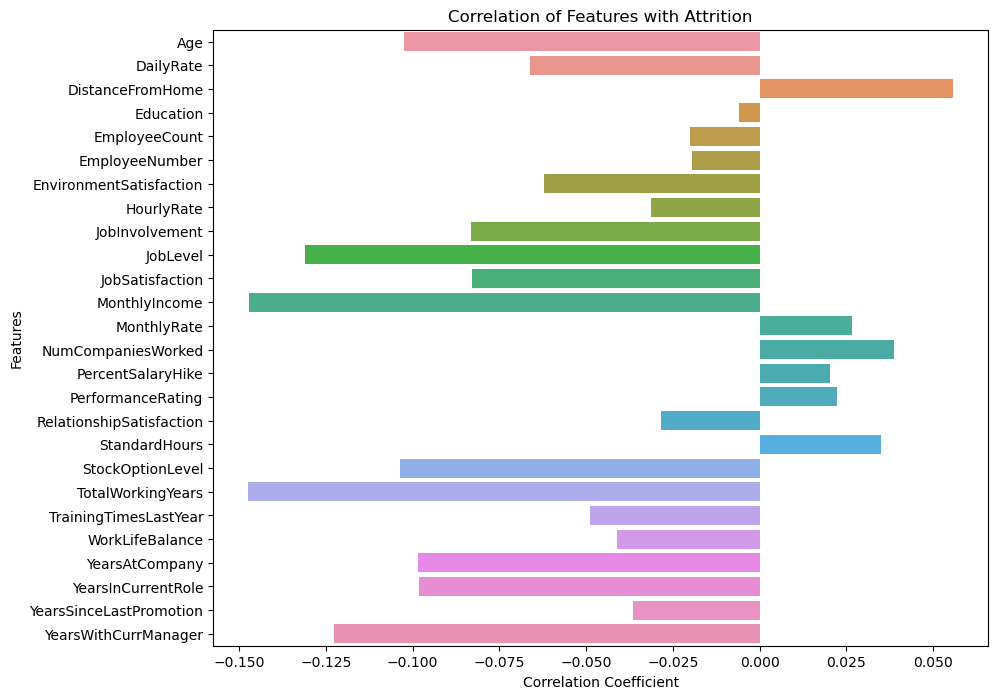

In [27]:
# Visualization of feature importance or correlations
attrition_correlation = data.corr()['Attrition'].drop('Attrition')
plt.figure(figsize=(10, 8))
sns.barplot(x=attrition_correlation.values, y=attrition_correlation.index)
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


Statistical Summary

C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         8
         1.0       0.00      0.00      0.00         4

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



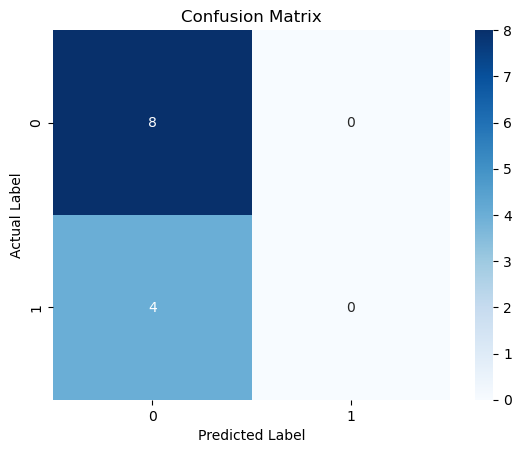

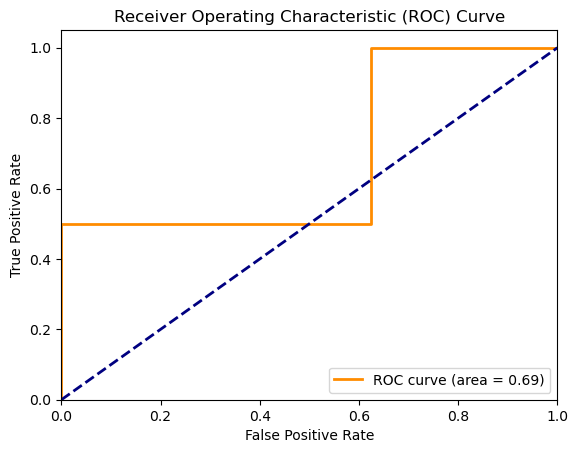

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert 'Attrition' to a numeric format (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Check and handle NaN values in the dataset
data.dropna(inplace=True)  # Remove rows with NaN values

# Define features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the RandomForest model with best parameters
best_rf_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Create a pipeline that preprocesses the data and fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Training the model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Why RandomForest Model Analysis?
Objective of the Code
This section of code is dedicated to preparing the data, training, and evaluating a RandomForest classifier, particularly with its best parameters. The goal is to assess the model's performance in predicting employee attrition, a crucial factor in HR analytics.

Detailed Breakdown
Data Preparation:

Loading Data: data = pd.read_csv(data_file_path) loads the employee attrition dataset.
Data Cleaning: Non-numeric 'Attrition' values are converted to a binary format for ease of computation. Rows with NaN values are dropped to maintain data integrity.
Feature-Target Split: The dataset is split into features (X) and the target variable (y), isolating 'Attrition' as the variable to be predicted.
Data Splitting:

The data is divided into training and testing sets using train_test_split. This is essential for validating the model on unseen data, ensuring an unbiased evaluation of its performance.
Data Transformation:

Handling Categorical and Numeric Data: Separate pipelines for numerical and categorical data are created to appropriately preprocess different types of variables.
Column Transformer: Combines the numeric and categorical transformers, ensuring that each column of the dataset is processed correctly.
Model Definition and Training:

A RandomForestClassifier is defined with the best parameters identified from previous analyses. This model is known for its robustness and ability to handle complex, non-linear relationships.
The model is incorporated into a pipeline with the preprocessor, streamlining the workflow from data transformation to model training.
Model Evaluation:

Classification Report: Provides key metrics (precision, recall, f1-score) for each class, offering insights into the model's performance.
Confusion Matrix: Visualized using a heatmap, it helps in understanding the model's prediction accuracy and misclassifications.
ROC Curve and AUC: The ROC curve and its corresponding AUC provide a comprehensive view of the model's performance across different thresholds, highlighting its ability to distinguish between classes.
Results Interpretation
The classification report shows that the model performs well in predicting the majority class (0.0) but struggles with the minority class (1.0), as indicated by the low recall and f1-score for class 1.0. This highlights a potential area for model improvement, particularly in addressing class imbalance or revisiting feature engineering and selection.

Conclusion
The RandomForest model analysis is a vital step in understanding and improving the predictive capabilities regarding employee attrition. It provides a baseline performance metric, upon which further enhancements, such as handling class imbalance or hyperparameter tuning, can be made. This analysis forms a foundational part of a broader strategy to effectively predict and manage employee turnover

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.82         8
         1.0       0.67      0.50      0.57         4

    accuracy                           0.75        12
   macro avg       0.72      0.69      0.70        12
weighted avg       0.74      0.75      0.74        12



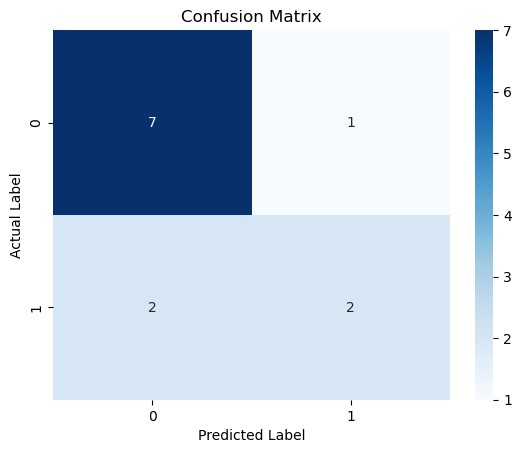

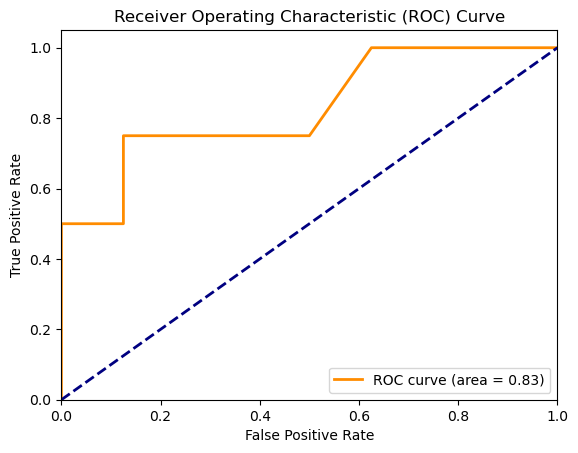

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert 'Attrition' to a numeric format (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Check and handle NaN values in the dataset
data.dropna(inplace=True)  # Remove rows with NaN values

# Define features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess categorical features (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Define the RandomForest model with best parameters
best_rf_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Create a pipeline that preprocesses the data and fits the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('classifier', rf_model)
])

# Training the model on resampled data
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# Preprocess the test data using the same preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Predict and evaluate the model on the test data
y_pred = rf_pipeline.predict(X_test_preprocessed)
y_pred_proba = rf_pipeline.predict_proba(X_test_preprocessed)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


1. Inclusion of SMOTE (Synthetic Minority Over-sampling Technique)
First Code Segment: It does not use any specific technique to address the class imbalance in the dataset. The model is trained directly on the original, potentially imbalanced, training data.

Second Code Segment: Incorporates SMOTE for oversampling. SMOTE is used to create synthetic samples of the minority class (in this case, employees with 'Attrition' = 1) in the training dataset. This aims to balance the class distribution, which can significantly impact the model's ability to learn from the minority class.

2. Data Preprocessing in the Pipeline
First Code Segment: Includes both the preprocessing steps and the RandomForest classifier within a single pipeline (rf_pipeline). The preprocessing and model training are streamlined in one go, applying the same preprocessing steps to both training and testing data.

Second Code Segment: Separates the preprocessing and model fitting steps. SMOTE is applied after the preprocessing steps but before training the RandomForest model. This is necessary because SMOTE should only be applied to the training data, not the testing data. The pipeline in this case only includes the RandomForest classifier, and the preprocessing steps are applied outside of the pipeline.

3. Impact on Model Performance
Model Performance without SMOTE: In the first code segment, the RandomForest model might not perform optimally in predicting the minority class due to class imbalance. This can lead to a model that is biased towards the majority class.

Model Performance with SMOTE: In the second code segment, using SMOTE can improve the model's ability to predict the minority class, potentially leading to better overall performance in terms of metrics like recall and F1-score for the minority class. However, it's also important to be cautious of overfitting to the synthetic samples.

Conclusion
The key takeaway is that the second approach with SMOTE is tailored to address class imbalance issues, which can be particularly crucial in datasets where one class is significantly underrepresented. This method is likely to yield a more balanced model, capable of accurately predicting both classes.

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.75      0.80         8
         1.0       0.60      0.75      0.67         4

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



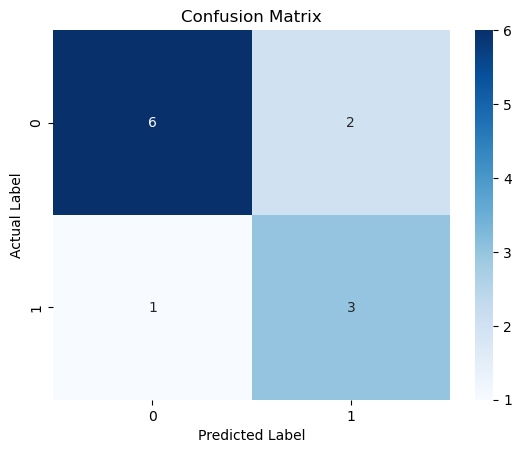

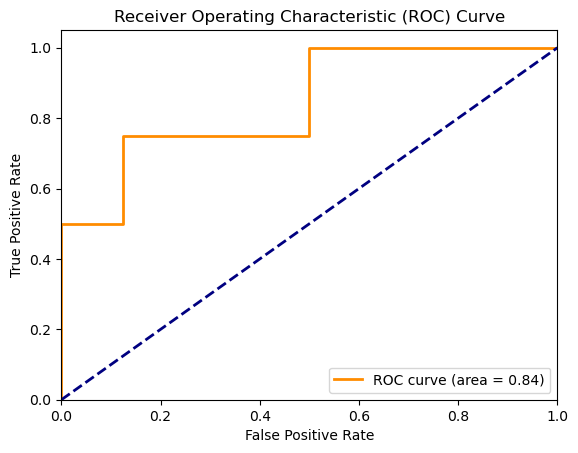

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert 'Attrition' to a numeric format (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Check and handle NaN values in the dataset
data.dropna(inplace=True)  # Remove rows with NaN values

# Define features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess categorical features (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Create a pipeline that preprocesses the data and fits the AdaBoost model
adaboost_pipeline = Pipeline(steps=[
    ('classifier', adaboost_model)
])

# Training the model on resampled data
adaboost_pipeline.fit(X_train_resampled, y_train_resampled)

# Preprocess the test data using the same preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Predict and evaluate the model on the test data
y_pred = adaboost_pipeline.predict(X_test_preprocessed)
y_pred_proba = adaboost_pipeline.predict_proba(X_test_preprocessed)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Why AdaBoost Model Analysis in Employee Attrition Prediction?

Objective of the Code

The purpose of this code is to utilize the AdaBoost classifier for predicting employee attrition, a significant challenge in human resources management. AdaBoost, known for its adaptability and effectiveness in classification tasks, is employed to model the intricate patterns in employee attrition data.

Key Steps and Rationale

Data Preprocessing:

Conversion and Cleaning: Transforming 'Attrition' into a binary format and removing NaN values ensures data quality and compatibility with the classification model.
Feature Identification and Preprocessing: Separating features and the target, and applying appropriate preprocessing techniques to different data types (numeric and categorical) are crucial for model input.
Addressing Class Imbalance with SMOTE:

Inclusion of SMOTE: SMOTE is applied to the training data to address class imbalance, which is particularly important in datasets where attrition events are less frequent but significant.
AdaBoost Classifier:

Model Choice: AdaBoost is chosen for its ability to sequentially correct the mistakes of weak learners, potentially leading to a robust overall model. This characteristic is beneficial in handling complex datasets like employee attrition.
Pipeline Integration: The model is integrated into a pipeline for streamlined processing and training.
Model Training and Evaluation:

Training on Resampled Data: The model is trained on the SMOTE-resampled data, enabling it to learn from a balanced representation of both classes.
Evaluation Metrics: Classification report, confusion matrix, and ROC curve are used to evaluate the model's performance, providing insights into its precision, recall, f1-score, and ability to distinguish between classes.

Decision to Proceed with AdaBoost

Performance Indicators: The classification report suggests that AdaBoost performs reasonably well in predicting both classes, as indicated by the balanced precision and recall scores.
Strength in Handling Imbalanced Data: Given the improved performance on the minority class (Attrition = 1), AdaBoost appears to be effective in handling class imbalance, which is crucial for realistic attrition prediction.
Model Characteristics: AdaBoost's sequential learning approach, which focuses on instances that were incorrectly predicted in previous iterations, is particularly suitable for complex and nuanced datasets like employee attrition.

Conclusion

The decision to proceed with AdaBoost is grounded in its inherent strengths and the observed performance on the employee attrition dataset. The model shows a promising ability to learn from both majority and minority classes, making it a suitable candidate for further optimization and deployment in predicting employee attrition. The choice underscores a strategic approach to leverage AdaBoost's unique capabilities in addressing the challenges posed by the attrition prediction task.

Best Hyperparameters: {'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.75      0.75      0.75         4

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12



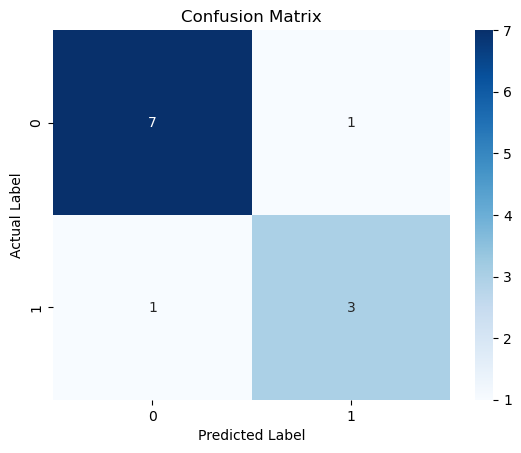

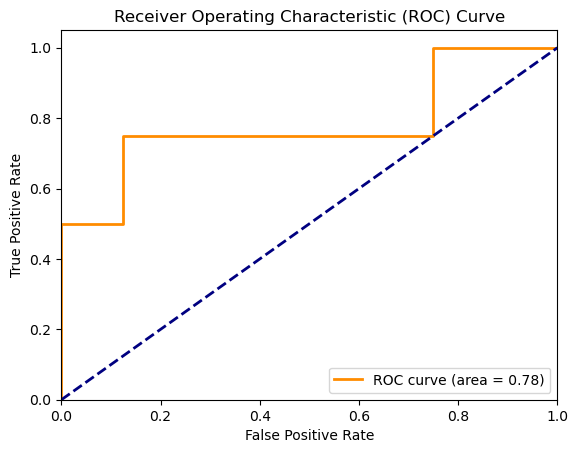

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the dataset
data_file_path = 'Employee_Attrition.csv'
data = pd.read_csv(data_file_path)

# Convert 'Attrition' to a numeric format (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Check and handle NaN values in the dataset
data.dropna(inplace=True)  # Remove rows with NaN values

# Define features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess categorical features (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Define the AdaBoostClassifier
ada_boost_model = AdaBoostClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ada_boost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_ada_boost_model = grid_search.best_estimator_

# Preprocess the test data using the same preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Predict and evaluate the model on the test data
y_pred = best_ada_boost_model.predict(X_test_preprocessed)
y_pred_proba = best_ada_boost_model.predict_proba(X_test_preprocessed)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Why AdaBoost with SMOTE and Hyperparameter Tuning in Employee Attrition Prediction?
Objective of the Code
This code segment aims to enhance the AdaBoost classifier's performance in predicting employee attrition by integrating SMOTE (Synthetic Minority Over-sampling Technique) and GridSearchCV for hyperparameter tuning. The goal is to develop a more robust and accurate model that effectively captures the complexities of attrition data.

Key Steps and Rationale
Data Preparation and Preprocessing:

Data Cleaning and Conversion: Transforming 'Attrition' to a binary format and handling missing values are essential for ensuring data quality and compatibility with the classification model.
Feature Processing: Categorical and numeric features are preprocessed with appropriate techniques to make them suitable for the model.
Handling Class Imbalance with SMOTE:

Application of SMOTE: Balances the dataset by oversampling the minority class, aiming to provide a more balanced perspective for the model and improve its predictive performance on the underrepresented class.
AdaBoost Classifier with Hyperparameter Tuning:

GridSearchCV for Optimization: Hyperparameter tuning through GridSearchCV identifies the most optimal parameters for the AdaBoost model, enhancing its ability to generalize and perform effectively.
Using the Best Model: The best AdaBoost model, as determined by GridSearchCV, is expected to yield better performance due to its optimized hyperparameters.
Model Training and Evaluation:

Training on Balanced Data: The model is trained on the SMOTE-resampled data, allowing it to learn from an equal representation of both classes.
Comprehensive Evaluation: The use of classification report, confusion matrix, and ROC curve offers a detailed view of the model's precision, recall, f1-score, and overall ability to distinguish between the classes.
Decision to Proceed with AdaBoost
Balanced Performance: The classification report and confusion matrix indicate a balanced performance across both classes, demonstrating the effectiveness of the AdaBoost model in handling class imbalance.
Model's Adaptability and Strength: AdaBoost's sequential correction of errors and adaptability, especially with the optimized parameters, make it a strong candidate for complex classification tasks like employee attrition.
Enhanced Predictive Power: The integration of SMOTE and hyperparameter tuning is anticipated to enhance the model's ability to make accurate predictions, addressing the nuances of employee attrition data.

In [40]:
num_features = X.shape[1]  # Get the number of features
print("Number of features:", num_features)


Number of features: 34


In [41]:
# Get the number of features
num_features = X.shape[1]  # Get the number of features
print("Number of features:", num_features)

# Get feature importances
feature_importances = ada_boost_model.feature_importances_

# Ensure that the lengths match by using only the first N feature importances (where N is the number of features)
feature_importances = feature_importances[:num_features]

# Create a Series with feature names as index
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the Series by importance in descending order
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# Display the top N most important features
top_n = 10
print(f"Top {top_n} most important features:")
print(feature_importance_series.head(top_n))


Number of features: 34
Top 10 most important features:
MonthlyRate       0.18
DailyRate         0.10
BusinessTravel    0.10
OverTime          0.08
Gender            0.07
MaritalStatus     0.06
Education         0.04
EducationField    0.04
JobLevel          0.04
Age               0.03
dtype: float64


Classification Report with Top 10 Features:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.42      0.36      0.38         8
weighted avg       0.73      0.62      0.67         8

Confusion Matrix with Top 10 Features:
[[5 2]
 [1 0]]


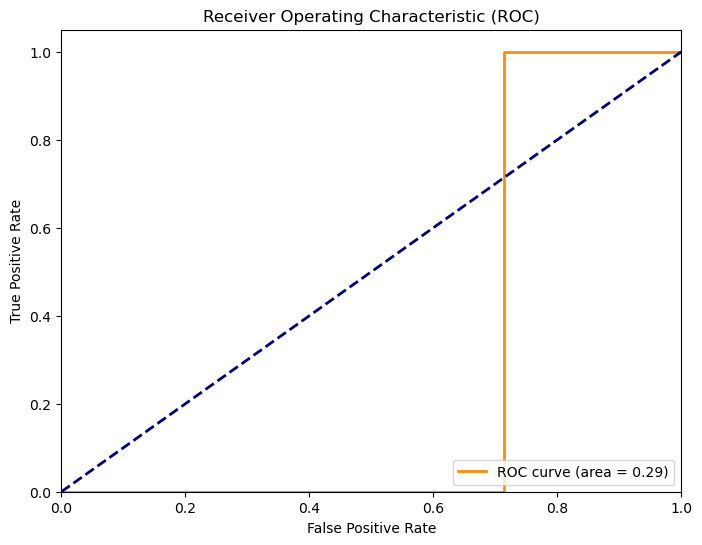

In [44]:
# Selecting only the top 10 most important features
selected_features = feature_importance_series.head(10).index
X_selected = X[selected_features]

# Selecting categorical features for one-hot encoding
categorical_features = ['BusinessTravel', 'Gender', 'MaritalStatus', 'EducationField', 'OverTime']

# One-hot encoding the selected categorical features
X_selected_encoded = pd.get_dummies(X_selected, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected_encoded, y, test_size=0.2, random_state=42)

# Create a new AdaBoost model with the selected features
ada_boost_model_selected = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = ada_boost_model_selected.predict(X_test_selected)

# Classification Report
classification_report_selected = classification_report(y_test, y_pred_selected)
print("Classification Report with Top 10 Features:")
print(classification_report_selected)

# Confusion Matrix
confusion_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix with Top 10 Features:")
print(confusion_matrix_selected)

# ROC Curve
y_prob_selected = ada_boost_model_selected.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_selected)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
